# Support Vector Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df = pd.read_csv('dataset.csv')
df = df[df['Position'] != 'Goalkeeper']
df = df.drop('index', axis = 1)
df = df.drop('Minutes', axis = 1)
df

,level_0,Player,Age,Matches Played,Start,Goals,Assists,Penalties Made,Yellow Cards,Red Cards,...,Successful Challenge %,Blocks,Interceptions,Tackles + Interceptions,Clearances,Errors,Club,Position,Nation,Value
0,0,Bruno Fernandes,27,37,37,8.0,8.0,2.0,6.0,0.0,...,42.3,37.0,25,93.0,40.0,1.0,Manchester United,midfield,Portugal,74900000.0
1,1,Randal Kolo Muani,23,32,31,15.0,11.0,2.0,6.0,1.0,...,11.1,19.0,3,17.0,13.0,0.0,Eintracht Frankfurt,Attack,France,64000000.0
2,2,Victor Osimhen,23,32,30,26.0,4.0,2.0,4.0,0.0,...,0.0,6.0,6,16.0,29.0,0.0,SSC Napoli,Attack,Nigeria,55000000.0
3,3,Bukayo Saka,20,38,37,14.0,11.0,2.0,6.0,0.0,...,45.5,38.0,14,77.0,19.0,0.0,Arsenal FC,Attack,England,55000000.0
4,4,Vinicius Junior,22,33,32,10.0,9.0,0.0,10.0,1.0,...,35.9,24.0,6,36.0,1.0,0.0,Real Madrid,Attack,Brazil,50000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744,1744,Carlos Soler,25,26,14,3.0,2.0,0.0,0.0,0.0,...,52.6,12.0,4,24.0,6.0,0.0,Paris Saint-Germain,midfield,Spain,-25000000.0
1745,1745,Ansu Fati,19,36,12,7.0,3.0,0.0,3.0,0.0,...,27.8,19.0,5,21.0,6.0,0.0,FC Barcelona,Attack,Spain,-25000000.0
1746,1746,Romelu Lukaku,29,25,19,10.0,6.0,2.0,1.0,0.0,...,40.0,3.0,0,3.0,16.0,0.0,Chelsea FC,Attack,Belgium,-30000000.0
1747,1747,Jadon Sancho,22,26,21,6.0,3.0,0.0,0.0,0.0,...,28.6,25.0,7,23.0,6.0,0.0,Manchester United,Attack,England,-30000000.0


# Attackers

In [3]:
attacker = df[df['Position'] == 'Attack']
attacker.head()

,level_0,Player,Age,Matches Played,Start,Goals,Assists,Penalties Made,Yellow Cards,Red Cards,...,Successful Challenge %,Blocks,Interceptions,Tackles + Interceptions,Clearances,Errors,Club,Position,Nation,Value
1,1,Randal Kolo Muani,23,32,31,15.0,11.0,2.0,6.0,1.0,...,11.1,19.0,3,17.0,13.0,0.0,Eintracht Frankfurt,Attack,France,64000000.0
2,2,Victor Osimhen,23,32,30,26.0,4.0,2.0,4.0,0.0,...,0.0,6.0,6,16.0,29.0,0.0,SSC Napoli,Attack,Nigeria,55000000.0
3,3,Bukayo Saka,20,38,37,14.0,11.0,2.0,6.0,0.0,...,45.5,38.0,14,77.0,19.0,0.0,Arsenal FC,Attack,England,55000000.0
4,4,Vinicius Junior,22,33,32,10.0,9.0,0.0,10.0,1.0,...,35.9,24.0,6,36.0,1.0,0.0,Real Madrid,Attack,Brazil,50000000.0
8,8,Rodrygo,21,34,25,9.0,8.0,1.0,4.0,0.0,...,17.4,23.0,8,25.0,5.0,0.0,Real Madrid,Attack,Brazil,40000000.0


In [4]:
attacker.columns

Index(['level_0', 'Player', 'Age', 'Matches Played', 'Start', 'Goals',
       'Assists', 'Penalties Made', 'Yellow Cards', 'Red Cards', 'Shots',
       'Shots On Target', 'Shots On Target %', 'Goals Per Shot',
       'Goals Per Shot On Target', 'Average Shot Distance',
       'Shots From Freekicks', 'Passes Completed', 'Passes',
       'Pass Completion %', 'Total Passing Distance',
       'Progressive Passing Distance', 'Shot-Creating Actions',
       'Shot-Creating Actions/90', 'SCA Pass Live', 'SCA Pass Dead',
       'SCA Take-ons', 'SCA Shots', 'SCA Fouls', 'SCA Defense',
       'Goal-Creating Actions', 'Goal-Creating Actions/90', 'Goal Pass Live',
       'Goal Pass Dead', 'Goal Take-ons', 'Goal Shots', 'Goal Fouls',
       'Goal Defense', 'Tackles', 'Tackles Won', 'Challenges',
       'Successful Challenge %', 'Blocks', 'Interceptions',
       'Tackles + Interceptions', 'Clearances', 'Errors', 'Club', 'Position',
       'Nation', 'Value'],
      dtype='object')

In [5]:
X = attacker.drop(['Player','Yellow Cards', 'Red Cards', 'Value', 'Nation', 'Club', 'Position', 'Passes Completed', 'Passes',
       'Pass Completion %', 'Total Passing Distance',
       'Progressive Passing Distance', 'Shot-Creating Actions',
       'Shot-Creating Actions/90', 'SCA Pass Live', 'SCA Pass Dead',
       'SCA Take-ons', 'SCA Shots', 'SCA Fouls', 'SCA Defense', 'Goal-Creating Actions/90', 'Goal Pass Live',
       'Goal Pass Dead', 'Goal Take-ons', 'Goal Shots', 'Goal Fouls',
       'Goal Defense', 'Tackles', 'Tackles Won', 'Challenges',
       'Successful Challenge %', 'Blocks', 'Interceptions',
       'Tackles + Interceptions', 'Clearances', 'Errors'],axis=1)
y = attacker['Value']

In [6]:
X.dtypes

level_0                       int64
Age                           int64
Matches Played                int64
Start                         int64
Goals                       float64
Assists                     float64
Penalties Made              float64
Shots                         int64
Shots On Target               int64
Shots On Target %           float64
Goals Per Shot              float64
Goals Per Shot On Target    float64
Average Shot Distance       float64
Shots From Freekicks        float64
Goal-Creating Actions       float64
dtype: object

# Model Training

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [8]:
#Robust Scaler
rs= RobustScaler()
X_train = rs.fit_transform(X_train)
X_test = rs.transform(X_test)

In [9]:
svr = SVR(kernel='rbf')
svr.fit(X_train,y_train)

SVR()

In [10]:
cross_val_train = cross_val_score(svr, X_train, y_train, scoring="neg_root_mean_squared_error",cv=5)
cross_val_test = cross_val_score(svr, X_test, y_test, scoring="neg_root_mean_squared_error",cv=5)

#Train Results
cross_val_train_mean = round(-(cross_val_train.mean()),2)
cross_val_train_max = round(-(cross_val_train.min()),2)
cross_val_train_min = round(-(cross_val_train.max()),2)

#Test Results
cross_val_test_mean = round(-(cross_val_test.mean()),2)
cross_val_test_max = round(-(cross_val_test.min()),2)
cross_val_test_min = round(-(cross_val_test.max()),2)

#Creating a Dataframe to display Validation Results
results = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

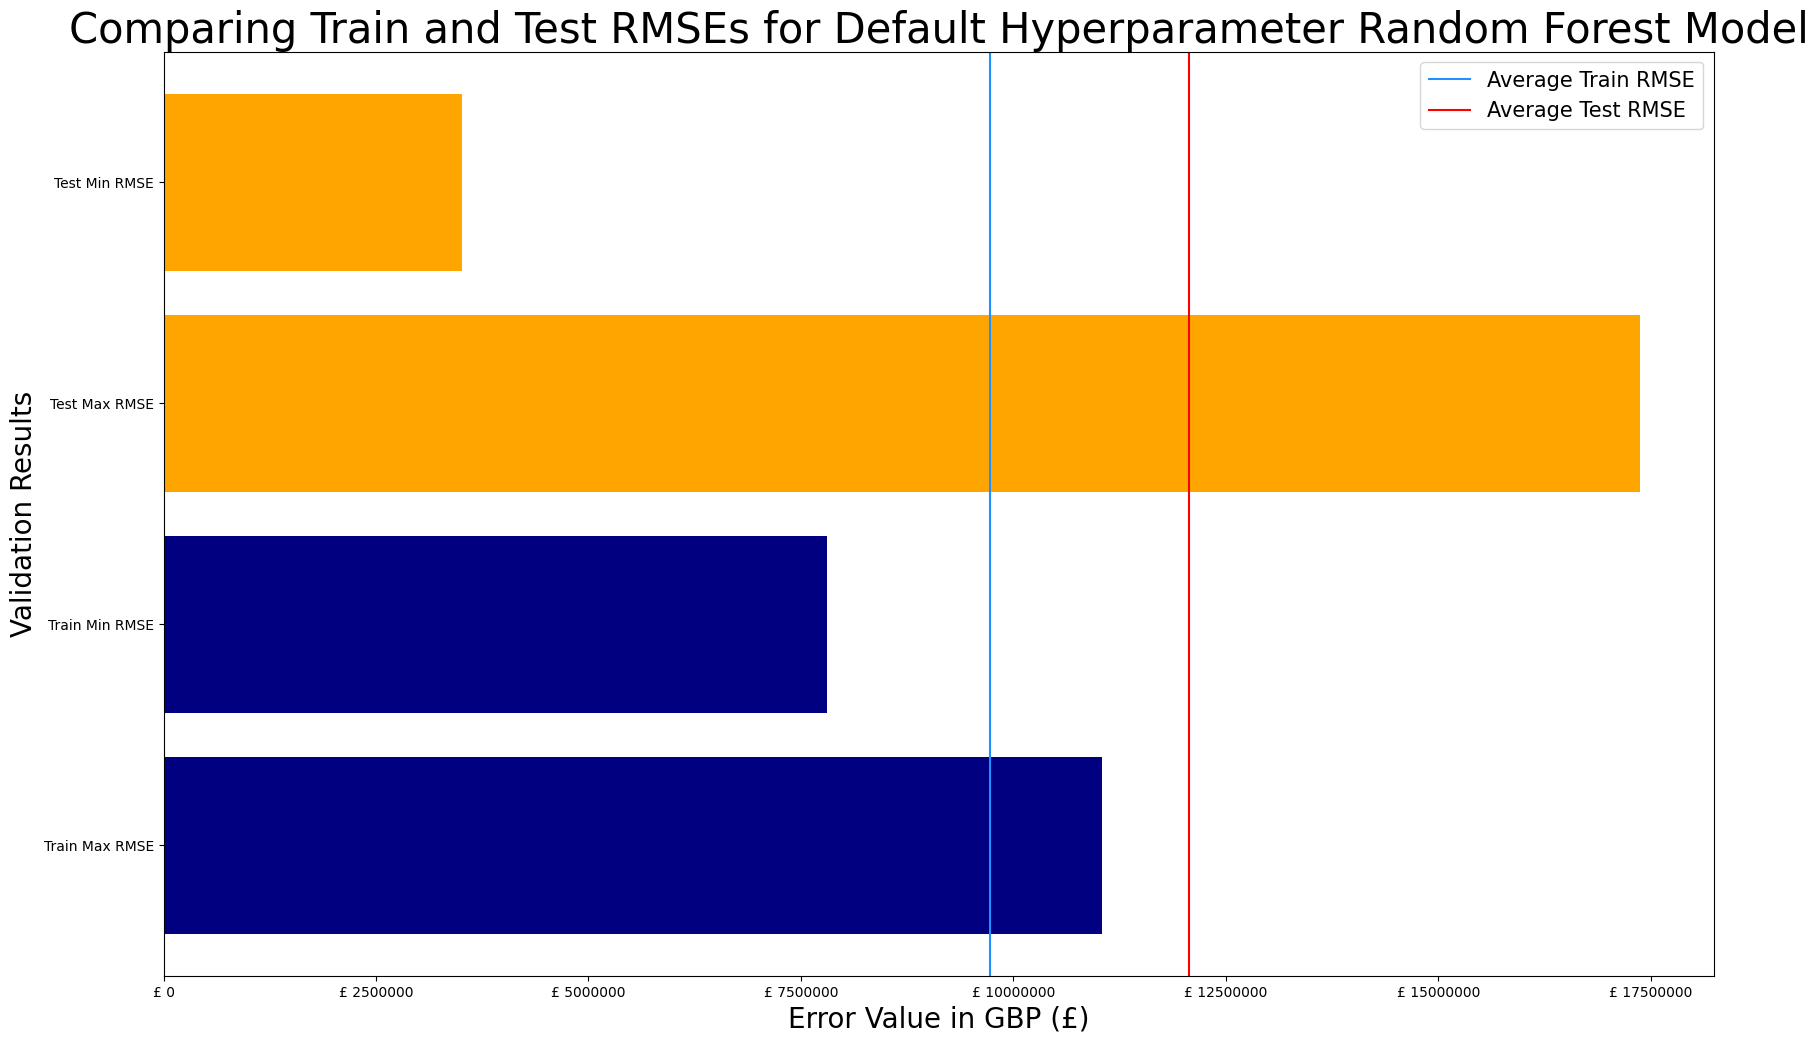

In [11]:
fig, ax = plt.subplots(figsize=(20,12))

x_ticks = list(range(0,max([results.iloc[0][2],(round(results.iloc[1][2])+1000000)]),2500000))
y_ticks = [1,2,3,4]
y_labels = ['Train Max RMSE','Train Min RMSE','Test Max RMSE','Test Min RMSE']

train_max_pos = 1
train_max = results.iloc[0][2]
ax.barh(train_max_pos,train_max,color='navy')

train_min_pos = 2
train_min = results.iloc[0][3]
ax.barh(train_min_pos,train_min,color='navy')

test_max_pos = 3
test_max = results.iloc[1][2]
ax.barh(test_max_pos,test_max,color='orange')

test_min_pos = 4
test_min = results.iloc[1][3]
ax.barh(test_min_pos,test_min,color='orange')

results_att = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results_att.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results_att.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

ax.axvline(x = results.iloc[0][1],label = 'Average Train RMSE',color='dodgerblue')
ax.axvline(x = results.iloc[1][1],label = 'Average Test RMSE',color='red')

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_xticks(x_ticks)
ax.set_xticklabels([f'£ {a}' for a in x_ticks])
ax.set_xlabel('Error Value in GBP (£)',fontsize=20)
ax.set_ylabel('Validation Results',fontsize=20)
ax.set_title('Comparing Train and Test RMSEs for Default Hyperparameter Random Forest Model',fontsize=30)
ax.legend(fontsize=15)

In [12]:
results_att

,Train/Test,Avg RMSE,Max RMSE,Min RMSE
0,Train,9720042.04,11041262.13,7806169.45
1,Test,12073063.82,17371510.39,3512121.64


In [13]:
from sklearn.metrics import r2_score

# Predict on the training and testing sets
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

# Calculate R-squared
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate the number of features
num_features = X_train.shape[1]

# Calculate adjusted R-squared
train_adj_r2 = 1 - (1 - train_r2) * ((len(y_train) - 1) / (len(y_train) - num_features - 1))
test_adj_r2 = 1 - (1 - test_r2) * ((len(y_test) - 1) / (len(y_test) - num_features - 1))

# Print the R-squared and adjusted R-squared values
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)
print("Train Adjusted R-squared:", train_adj_r2)
print("Test Adjusted R-squared:", test_adj_r2)

Train R-squared: -0.0006224255890603381
Test R-squared: -0.0176898178383198
Train Adjusted R-squared: -0.04797048989138175
Test Adjusted R-squared: -0.1783776838127913


In [14]:
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                    Variable        VIF
0                    level_0   5.443827
1                        Age  32.213490
2             Matches Played  27.695966
3                      Start  18.409453
4                      Goals  31.066896
5                    Assists   7.928795
6             Penalties Made   3.358852
7                      Shots  68.392787
8            Shots On Target  74.635064
9          Shots On Target %  15.096607
10            Goals Per Shot  27.897305
11  Goals Per Shot On Target  22.775687
12     Average Shot Distance  19.361342
13      Shots From Freekicks   1.708664
14     Goal-Creating Actions  13.524820


<Axes: >

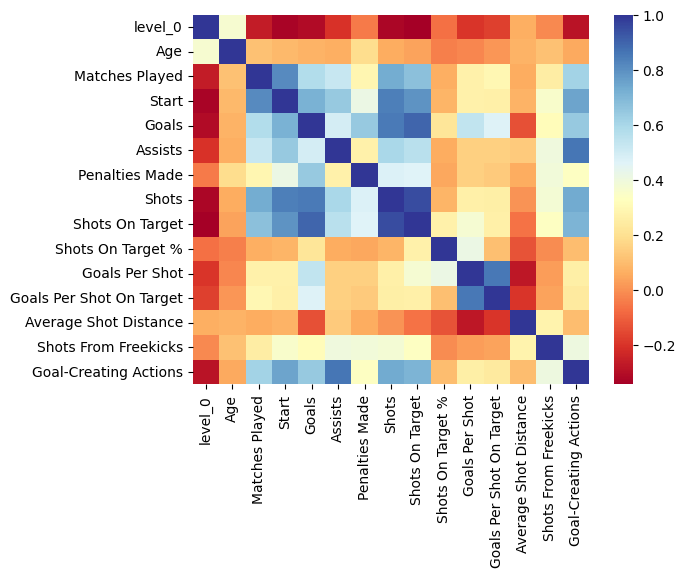

In [15]:
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot = False, cmap='RdYlBu')

In [16]:
X = X.drop(['Matches Played', 'Start', 'Shots', 'Shots On Target', 'Penalties Made', 'Goals Per Shot On Target'], axis=1)

In [17]:
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                Variable        VIF
0                level_0   5.233688
1                    Age  27.843147
2                  Goals   4.977974
3                Assists   7.838960
4      Shots On Target %   9.370821
5         Goals Per Shot   5.339307
6  Average Shot Distance  17.641807
7   Shots From Freekicks   1.544859
8  Goal-Creating Actions  12.136092


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [19]:
rs= RobustScaler()
X_train = rs.fit_transform(X_train)
X_test = rs.transform(X_test)

In [20]:
pt = PowerTransformer()
X_train = pt.fit_transform(X_train)
X_test = pt.transform(X_test)

In [21]:
svr = SVR(kernel='rbf')
svr.fit(X_train,y_train)

SVR()

In [22]:
cross_val_train = cross_val_score(svr, X_train, y_train, scoring="neg_root_mean_squared_error",cv=5)
cross_val_test = cross_val_score(svr, X_test, y_test, scoring="neg_root_mean_squared_error",cv=5)

#Train Results
cross_val_train_mean = round(-(cross_val_train.mean()),2)
cross_val_train_max = round(-(cross_val_train.min()),2)
cross_val_train_min = round(-(cross_val_train.max()),2)

#Test Results
cross_val_test_mean = round(-(cross_val_test.mean()),2)
cross_val_test_max = round(-(cross_val_test.min()),2)
cross_val_test_min = round(-(cross_val_test.max()),2)

#Creating a Dataframe to display Validation Results
results = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

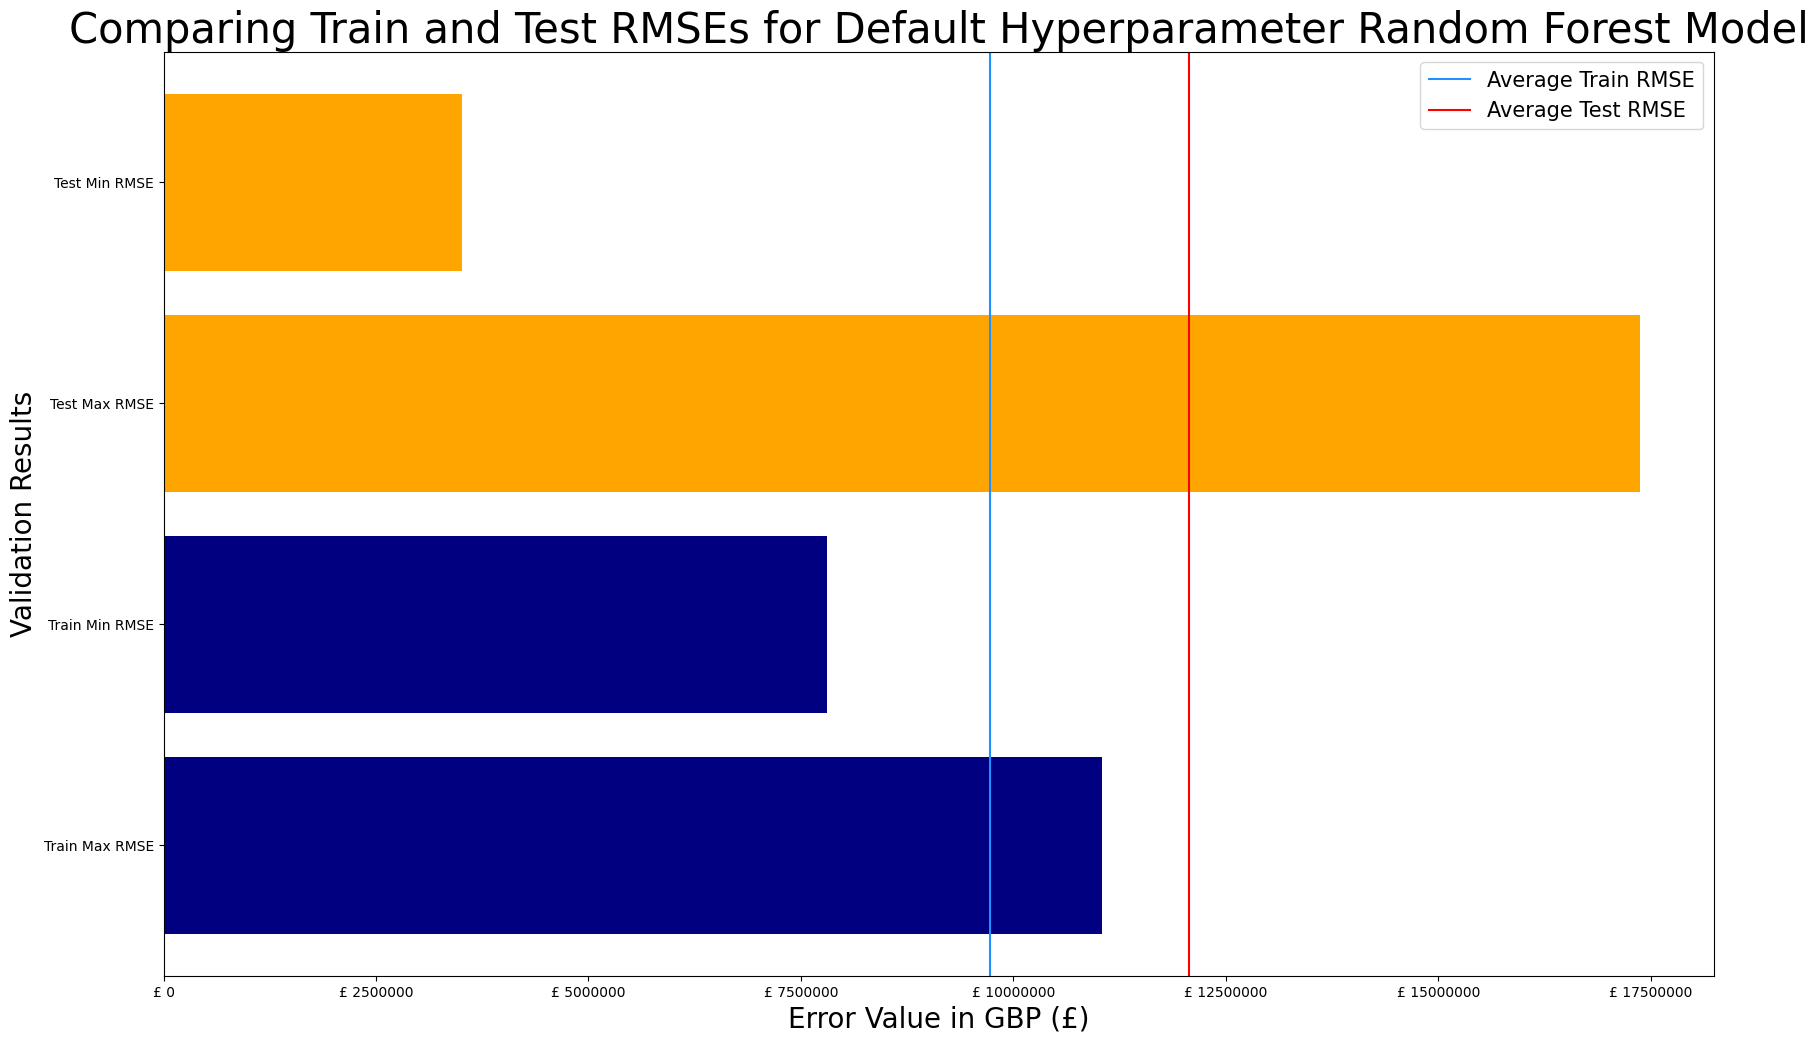

In [23]:
fig, ax = plt.subplots(figsize=(20,12))

x_ticks = list(range(0,max([results.iloc[0][2],(round(results.iloc[1][2])+1000000)]),2500000))
y_ticks = [1,2,3,4]
y_labels = ['Train Max RMSE','Train Min RMSE','Test Max RMSE','Test Min RMSE']

train_max_pos = 1
train_max = results.iloc[0][2]
ax.barh(train_max_pos,train_max,color='navy')

train_min_pos = 2
train_min = results.iloc[0][3]
ax.barh(train_min_pos,train_min,color='navy')

test_max_pos = 3
test_max = results.iloc[1][2]
ax.barh(test_max_pos,test_max,color='orange')

test_min_pos = 4
test_min = results.iloc[1][3]
ax.barh(test_min_pos,test_min,color='orange')

results_att = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results_att.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results_att.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

ax.axvline(x = results.iloc[0][1],label = 'Average Train RMSE',color='dodgerblue')
ax.axvline(x = results.iloc[1][1],label = 'Average Test RMSE',color='red')

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_xticks(x_ticks)
ax.set_xticklabels([f'£ {a}' for a in x_ticks])
ax.set_xlabel('Error Value in GBP (£)',fontsize=20)
ax.set_ylabel('Validation Results',fontsize=20)
ax.set_title('Comparing Train and Test RMSEs for Default Hyperparameter Random Forest Model',fontsize=30)
ax.legend(fontsize=15)

In [24]:
results_att

,Train/Test,Avg RMSE,Max RMSE,Min RMSE
0,Train,9720037.02,11041257.14,7806164.07
1,Test,12073061.47,17371507.51,3512119.16


In [25]:
from sklearn.metrics import r2_score

# Predict on the training and testing sets
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

# Calculate R-squared
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate the number of features
num_features = X_train.shape[1]

# Calculate adjusted R-squared
train_adj_r2 = 1 - (1 - train_r2) * ((len(y_train) - 1) / (len(y_train) - num_features - 1))
test_adj_r2 = 1 - (1 - test_r2) * ((len(y_test) - 1) / (len(y_test) - num_features - 1))

# Print the R-squared and adjusted R-squared values
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)
print("Train Adjusted R-squared:", train_adj_r2)
print("Test Adjusted R-squared:", test_adj_r2)

Train R-squared: -0.000621158535864641
Test R-squared: -0.017688781691211686
Train Adjusted R-squared: -0.02850224344862884
Test Adjusted R-squared: -0.10837392065379503


# Tuning

In [26]:
parameters = { 'C':[0.1,1,100,1000],
              'kernel':['rbf','poly','sigmoid','linear'],
              'degree':[1,2,3,4,5,6],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

In [27]:
grid_search = GridSearchCV(estimator = svr, param_grid = parameters, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [28]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
[CV] END ...............C=0.1, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.1, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.1, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.1, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..............C=0.1, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..............C=0.1, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ...........C=0.1, degree=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ...........C=0.1, degree=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ...........C=0.1, degree=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ...........C=0.1, degree=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ............C=0.1, degree=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ............C=0.1, degree=1, gamma=1

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 100, 1000], 'degree': [1, 2, 3, 4, 5, 6],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             verbose=2)

In [29]:
grid_search.best_params_

{'C': 1000, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}

In [30]:
param_values = list((grid_search.best_params_).values())
param_values

[1000, 3, 1, 'poly']

In [31]:
svr_Grid = SVR(C = param_values[0],
              degree = param_values[1],
              gamma = param_values[2],
              kernel=param_values[3])

svr_Grid.fit(X_train,y_train)

SVR(C=1000, gamma=1, kernel='poly')

In [32]:
cross_val_train = cross_val_score(svr_Grid, X_train, y_train, scoring="neg_root_mean_squared_error",cv=5)
cross_val_test = cross_val_score(svr_Grid, X_test, y_test, scoring="neg_root_mean_squared_error",cv=5)

#Train Results
cross_val_train_mean = round(-(cross_val_train.mean()),2)
cross_val_train_max = round(-(cross_val_train.min()),2)
cross_val_train_min = round(-(cross_val_train.max()),2)

#Test Results
cross_val_test_mean = round(-(cross_val_test.mean()),2)
cross_val_test_max = round(-(cross_val_test.min()),2)
cross_val_test_min = round(-(cross_val_test.max()),2)

#Creating a Dataframe to display Validation Results
results_att = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results_att.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results_att.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

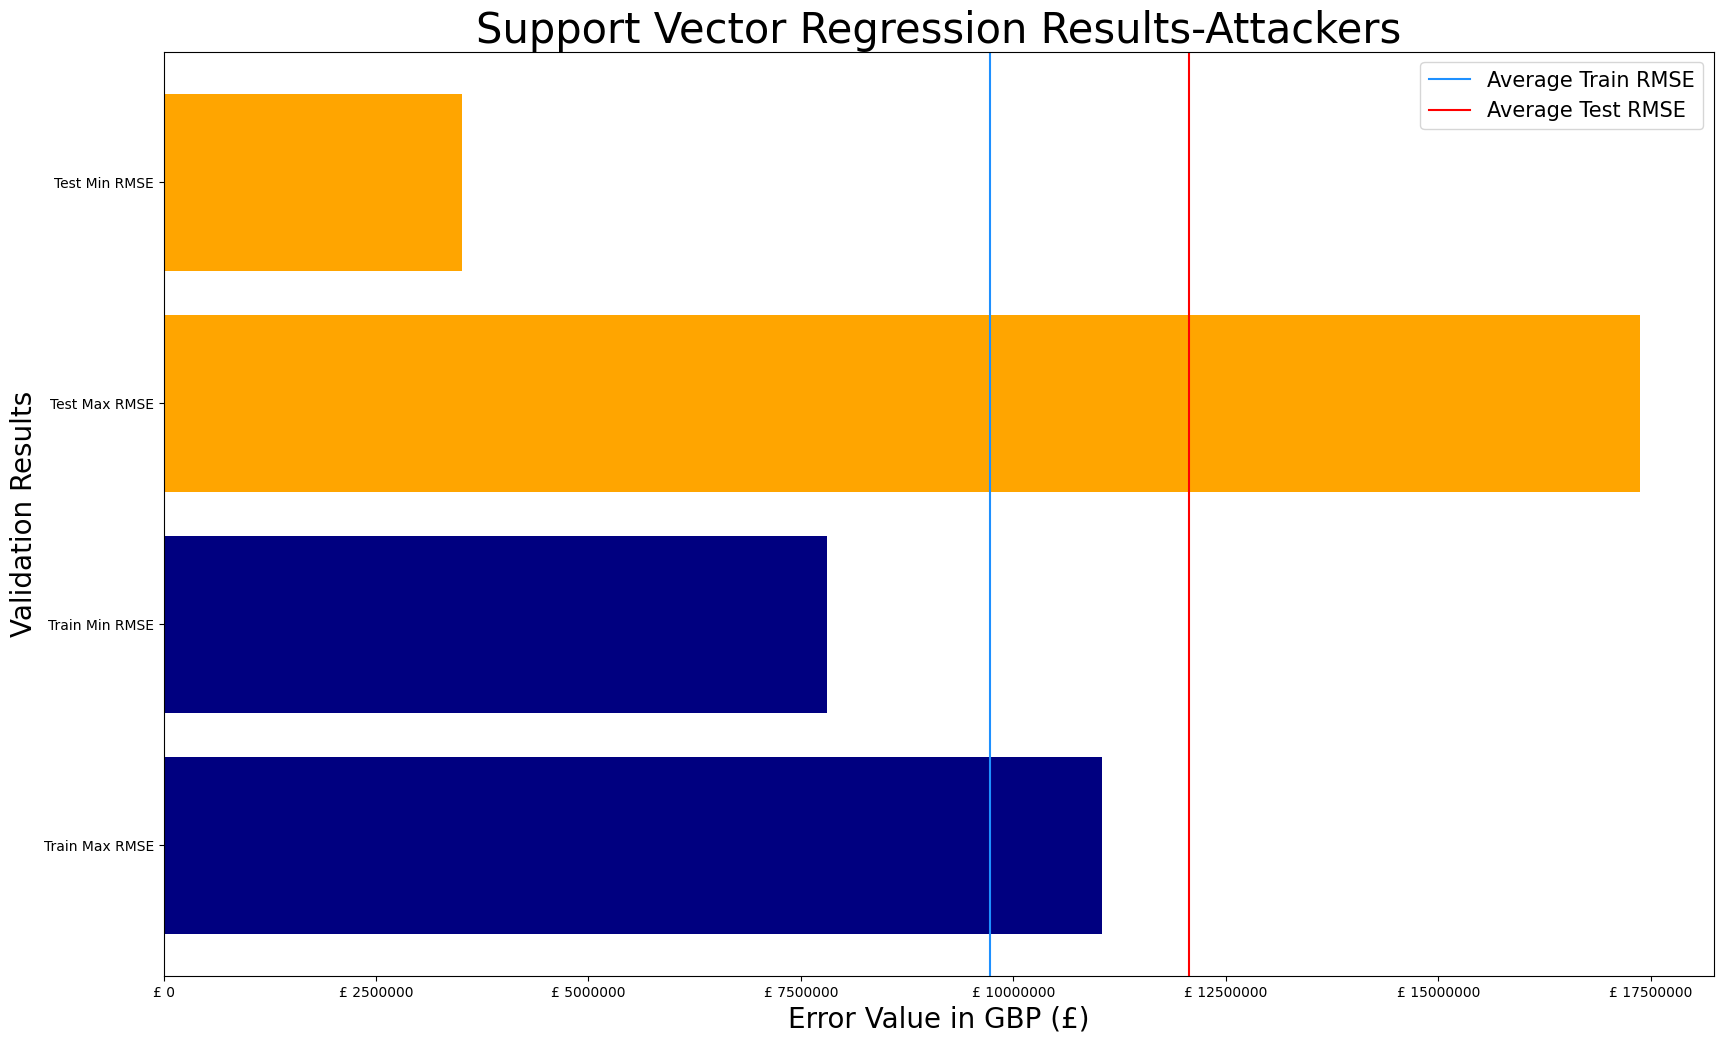

In [33]:
fig, ax = plt.subplots(figsize=(20,12))

x_ticks = list(range(0,max([results.iloc[0][2],(round(results.iloc[1][2])+1000000)]),2500000))
y_ticks = [1,2,3,4]
y_labels = ['Train Max RMSE','Train Min RMSE','Test Max RMSE','Test Min RMSE']

train_max_pos = 1
train_max = results.iloc[0][2]
ax.barh(train_max_pos,train_max,color='navy')

train_min_pos = 2
train_min = results.iloc[0][3]
ax.barh(train_min_pos,train_min,color='navy')

test_max_pos = 3
test_max = results.iloc[1][2]
ax.barh(test_max_pos,test_max,color='orange')

test_min_pos = 4
test_min = results.iloc[1][3]
ax.barh(test_min_pos,test_min,color='orange')

results_att = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results_att.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results_att.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

ax.axvline(x = results.iloc[0][1],label = 'Average Train RMSE',color='dodgerblue')
ax.axvline(x = results.iloc[1][1],label = 'Average Test RMSE',color='red')

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_xticks(x_ticks)
ax.set_xticklabels([f'£ {a}' for a in x_ticks])
ax.set_xlabel('Error Value in GBP (£)',fontsize=20)
ax.set_ylabel('Validation Results',fontsize=20)
ax.set_title('Support Vector Regression Results-Attackers',fontsize=30)
ax.legend(fontsize=15)

In [34]:
results_att

,Train/Test,Avg RMSE,Max RMSE,Min RMSE
0,Train,6433631.39,7867017.00,4626641.96
1,Test,9947365.14,13938271.64,2580144.55


In [35]:
from sklearn.metrics import r2_score

# Predict on the training and testing sets
y_train_pred = svr_Grid.predict(X_train)
y_test_pred = svr_Grid.predict(X_test)

# Calculate R-squared
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate the number of features
num_features = X_train.shape[1]

# Calculate adjusted R-squared
train_adj_r2 = 1 - (1 - train_r2) * ((len(y_train) - 1) / (len(y_train) - num_features - 1))
test_adj_r2 = 1 - (1 - test_r2) * ((len(y_test) - 1) / (len(y_test) - num_features - 1))

# Print the R-squared and adjusted R-squared values
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)
print("Train Adjusted R-squared:", train_adj_r2)
print("Test Adjusted R-squared:", test_adj_r2)

Train R-squared: 0.6053024345709147
Test R-squared: 0.488407649200152
Train Adjusted R-squared: 0.5943046695899185
Test Adjusted R-squared: 0.4428202120001655


# Midfielders

In [36]:
midfielder = df[df['Position'] == 'midfield']
midfielder.head()

,level_0,Player,Age,Matches Played,Start,Goals,Assists,Penalties Made,Yellow Cards,Red Cards,...,Successful Challenge %,Blocks,Interceptions,Tackles + Interceptions,Clearances,Errors,Club,Position,Nation,Value
0,0,Bruno Fernandes,27,37,37,8.0,8.0,2.0,6.0,0.0,...,42.3,37.0,25,93.0,40.0,1.0,Manchester United,midfield,Portugal,74900000.0
6,6,Jamal Musiala,19,33,26,12.0,10.0,0.0,1.0,0.0,...,37.1,30.0,19,53.0,3.0,0.0,Bayern Munich,midfield,Germany,45000000.0
7,7,Martin Odegaard,23,37,37,15.0,7.0,0.0,4.0,0.0,...,29.8,20.0,6,42.0,12.0,1.0,Arsenal FC,midfield,Norway,45000000.0
11,11,Jude Bellingham,19,31,30,8.0,4.0,1.0,8.0,0.0,...,66.7,51.0,35,111.0,30.0,0.0,Real Madrid,midfield,England,40000000.0
12,12,Vitinha,22,17,12,7.0,2.0,0.0,2.0,0.0,...,42.9,17.0,4,26.0,17.0,0.0,Paris Saint-Germain,midfield,Portugal,36000000.0


In [37]:
midfielder.columns

Index(['level_0', 'Player', 'Age', 'Matches Played', 'Start', 'Goals',
       'Assists', 'Penalties Made', 'Yellow Cards', 'Red Cards', 'Shots',
       'Shots On Target', 'Shots On Target %', 'Goals Per Shot',
       'Goals Per Shot On Target', 'Average Shot Distance',
       'Shots From Freekicks', 'Passes Completed', 'Passes',
       'Pass Completion %', 'Total Passing Distance',
       'Progressive Passing Distance', 'Shot-Creating Actions',
       'Shot-Creating Actions/90', 'SCA Pass Live', 'SCA Pass Dead',
       'SCA Take-ons', 'SCA Shots', 'SCA Fouls', 'SCA Defense',
       'Goal-Creating Actions', 'Goal-Creating Actions/90', 'Goal Pass Live',
       'Goal Pass Dead', 'Goal Take-ons', 'Goal Shots', 'Goal Fouls',
       'Goal Defense', 'Tackles', 'Tackles Won', 'Challenges',
       'Successful Challenge %', 'Blocks', 'Interceptions',
       'Tackles + Interceptions', 'Clearances', 'Errors', 'Club', 'Position',
       'Nation', 'Value'],
      dtype='object')

In [38]:
X = midfielder.drop(['Player','Yellow Cards', 'Red Cards', 'Value', 'Nation', 'Club', 'Position','Shots',
       'Shots On Target', 'Shots On Target %', 'Goals Per Shot',
       'Goals Per Shot On Target', 'Average Shot Distance', 
        'Tackles', 'Tackles Won', 'Challenges',
       'Successful Challenge %', 'Blocks', 'Interceptions',
       'Tackles + Interceptions', 'Clearances', 'Errors'],axis=1)
y = midfielder['Value']

In [39]:
X.dtypes

level_0                           int64
Age                               int64
Matches Played                    int64
Start                             int64
Goals                           float64
Assists                         float64
Penalties Made                  float64
Shots From Freekicks            float64
Passes Completed                float64
Passes                          float64
Pass Completion %               float64
Total Passing Distance          float64
Progressive Passing Distance    float64
Shot-Creating Actions           float64
Shot-Creating Actions/90        float64
SCA Pass Live                   float64
SCA Pass Dead                   float64
SCA Take-ons                    float64
SCA Shots                       float64
SCA Fouls                       float64
SCA Defense                     float64
Goal-Creating Actions           float64
Goal-Creating Actions/90        float64
Goal Pass Live                  float64
Goal Pass Dead                  float64


# Model Training

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

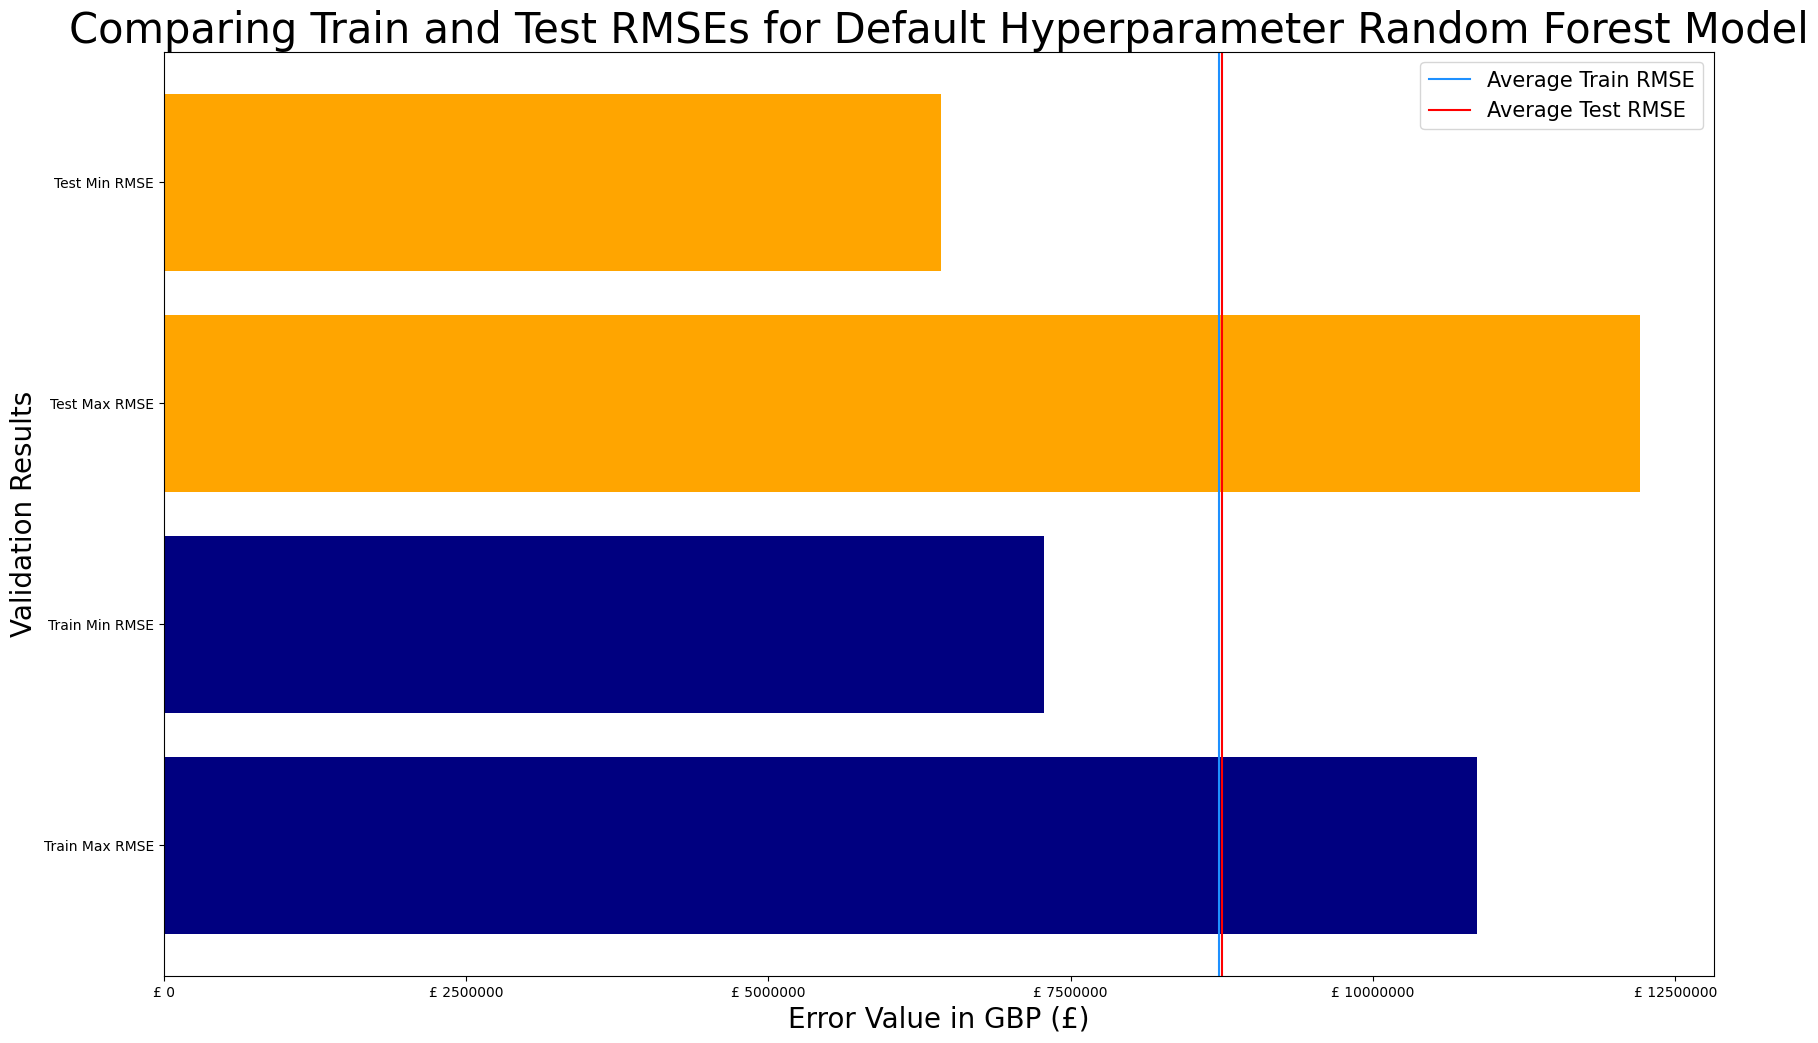

In [41]:
#Robust Scaler
rs= RobustScaler()
X_train = rs.fit_transform(X_train)
X_test = rs.transform(X_test)

svr = SVR(kernel='rbf')
svr.fit(X_train,y_train)

cross_val_train = cross_val_score(svr, X_train, y_train, scoring="neg_root_mean_squared_error",cv=5)
cross_val_test = cross_val_score(svr, X_test, y_test, scoring="neg_root_mean_squared_error",cv=5)

#Train Results
cross_val_train_mean = round(-(cross_val_train.mean()),2)
cross_val_train_max = round(-(cross_val_train.min()),2)
cross_val_train_min = round(-(cross_val_train.max()),2)

#Test Results
cross_val_test_mean = round(-(cross_val_test.mean()),2)
cross_val_test_max = round(-(cross_val_test.min()),2)
cross_val_test_min = round(-(cross_val_test.max()),2)

#Creating a Dataframe to display Validation Results
results = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

fig, ax = plt.subplots(figsize=(20,12))

x_ticks = list(range(0,max([results.iloc[0][2],(round(results.iloc[1][2])+1000000)]),2500000))
y_ticks = [1,2,3,4]
y_labels = ['Train Max RMSE','Train Min RMSE','Test Max RMSE','Test Min RMSE']

train_max_pos = 1
train_max = results.iloc[0][2]
ax.barh(train_max_pos,train_max,color='navy')

train_min_pos = 2
train_min = results.iloc[0][3]
ax.barh(train_min_pos,train_min,color='navy')

test_max_pos = 3
test_max = results.iloc[1][2]
ax.barh(test_max_pos,test_max,color='orange')

test_min_pos = 4
test_min = results.iloc[1][3]
ax.barh(test_min_pos,test_min,color='orange')

results_mid = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results_mid.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results_mid.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

ax.axvline(x = results.iloc[0][1],label = 'Average Train RMSE',color='dodgerblue')
ax.axvline(x = results.iloc[1][1],label = 'Average Test RMSE',color='red')

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_xticks(x_ticks)
ax.set_xticklabels([f'£ {a}' for a in x_ticks])
ax.set_xlabel('Error Value in GBP (£)',fontsize=20)
ax.set_ylabel('Validation Results',fontsize=20)
ax.set_title('Comparing Train and Test RMSEs for Default Hyperparameter Random Forest Model',fontsize=30)
ax.legend(fontsize=15)

In [42]:
results_mid

,Train/Test,Avg RMSE,Max RMSE,Min RMSE
0,Train,8725699.72,10862872.52,7276881.04
1,Test,8753740.65,12205117.22,6424352.72


In [43]:
from sklearn.metrics import r2_score

# Predict on the training and testing sets
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

# Calculate R-squared
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate the number of features
num_features = X_train.shape[1]

# Calculate adjusted R-squared
train_adj_r2 = 1 - (1 - train_r2) * ((len(y_train) - 1) / (len(y_train) - num_features - 1))
test_adj_r2 = 1 - (1 - test_r2) * ((len(y_test) - 1) / (len(y_test) - num_features - 1))

# Print the R-squared and adjusted R-squared values
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)
print("Train Adjusted R-squared:", train_adj_r2)
print("Test Adjusted R-squared:", test_adj_r2)

Train R-squared: -0.03454135654163237
Test R-squared: -0.026818717929068203
Train Adjusted R-squared: -0.11857973004221312
Test Adjusted R-squared: -0.3245961461284981


In [44]:
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                        Variable          VIF
0                        level_0     5.927643
1                            Age    54.840095
2                 Matches Played    36.106014
3                          Start    46.774800
4                          Goals     4.807781
5                        Assists     8.145335
6                 Penalties Made     1.655420
7           Shots From Freekicks     3.243267
8               Passes Completed   763.764170
9                         Passes  1102.581177
10             Pass Completion %    57.162518
11        Total Passing Distance   290.840373
12  Progressive Passing Distance    83.697395
13         Shot-Creating Actions          inf
14      Shot-Creating Actions/90    28.690187
15                 SCA Pass Live          inf
16                 SCA Pass Dead          inf
17                  SCA Take-ons          inf
18                     SCA Shots          inf
19                     SCA Fouls          inf
20                   SCA Defense  

/Users/tony/Library/Python/3.9/lib/python/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [45]:
X = X.drop(['Matches Played', 'Start','Passes','Penalties Made','Passes Completed', 'Shot-Creating Actions', 'Goal-Creating Actions', 'SCA Pass Live', 'SCA Pass Dead', 'SCA Take-ons',
'SCA Shots', 'SCA Fouls', 'SCA Defense','Goal Pass Dead', 'Goal Take-ons', 'Goal Shots', 'Goal Fouls', 'Goal Pass Live',
'Goal Defense'], axis=1)

In [46]:
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                       Variable        VIF
0                       level_0   5.338432
1                           Age  47.065667
2                         Goals   2.747059
3                       Assists   3.776221
4          Shots From Freekicks   1.906742
5             Pass Completion %  45.621685
6        Total Passing Distance  68.511758
7  Progressive Passing Distance  60.998426
8      Shot-Creating Actions/90  12.176160
9      Goal-Creating Actions/90   5.162250


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

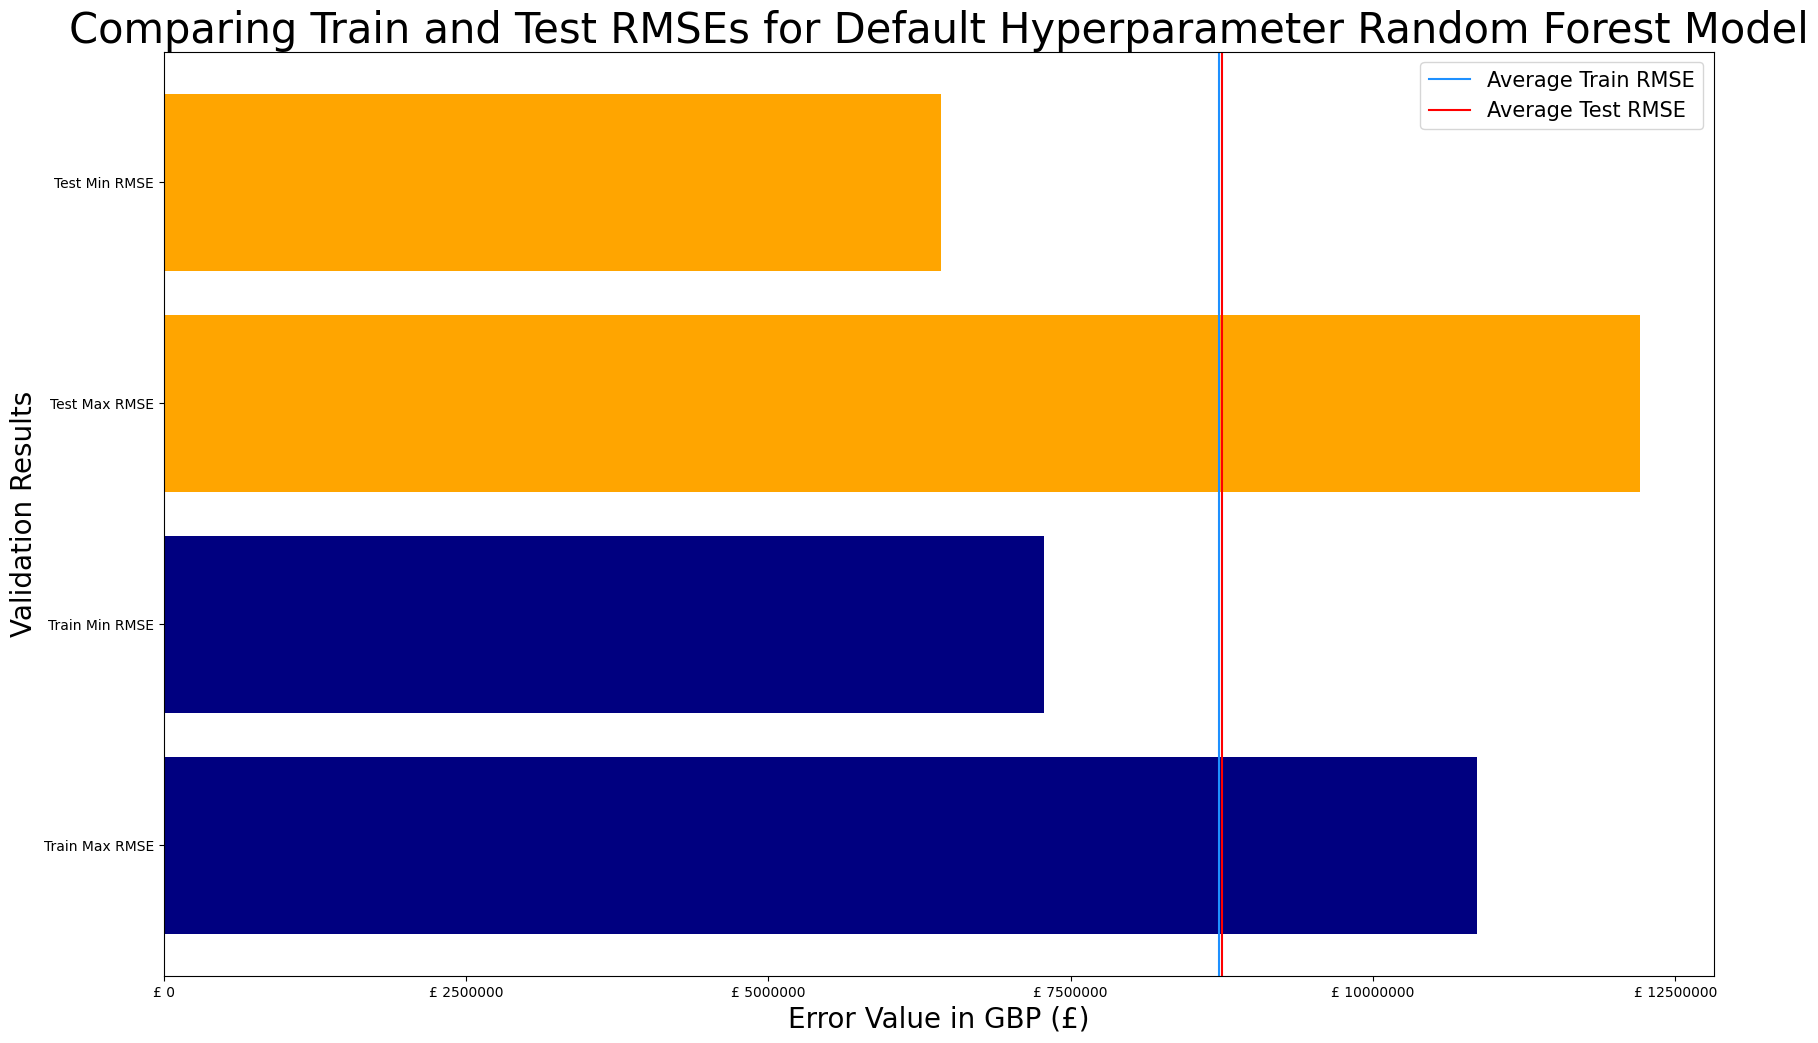

In [48]:
#Robust Scaler
rs= RobustScaler()
X_train = rs.fit_transform(X_train)
X_test = rs.transform(X_test)

pt = PowerTransformer()
X_train = pt.fit_transform(X_train)
X_test = pt.transform(X_test)

svr = SVR(kernel='rbf')
svr.fit(X_train,y_train)

cross_val_train = cross_val_score(svr, X_train, y_train, scoring="neg_root_mean_squared_error",cv=5)
cross_val_test = cross_val_score(svr, X_test, y_test, scoring="neg_root_mean_squared_error",cv=5)

#Train Results
cross_val_train_mean = round(-(cross_val_train.mean()),2)
cross_val_train_max = round(-(cross_val_train.min()),2)
cross_val_train_min = round(-(cross_val_train.max()),2)

#Test Results
cross_val_test_mean = round(-(cross_val_test.mean()),2)
cross_val_test_max = round(-(cross_val_test.min()),2)
cross_val_test_min = round(-(cross_val_test.max()),2)

#Creating a Dataframe to display Validation Results
results = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

fig, ax = plt.subplots(figsize=(20,12))

x_ticks = list(range(0,max([results.iloc[0][2],(round(results.iloc[1][2])+1000000)]),2500000))
y_ticks = [1,2,3,4]
y_labels = ['Train Max RMSE','Train Min RMSE','Test Max RMSE','Test Min RMSE']

train_max_pos = 1
train_max = results.iloc[0][2]
ax.barh(train_max_pos,train_max,color='navy')

train_min_pos = 2
train_min = results.iloc[0][3]
ax.barh(train_min_pos,train_min,color='navy')

test_max_pos = 3
test_max = results.iloc[1][2]
ax.barh(test_max_pos,test_max,color='orange')

test_min_pos = 4
test_min = results.iloc[1][3]
ax.barh(test_min_pos,test_min,color='orange')

results_mid = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results_mid.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results_mid.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

ax.axvline(x = results.iloc[0][1],label = 'Average Train RMSE',color='dodgerblue')
ax.axvline(x = results.iloc[1][1],label = 'Average Test RMSE',color='red')

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_xticks(x_ticks)
ax.set_xticklabels([f'£ {a}' for a in x_ticks])
ax.set_xlabel('Error Value in GBP (£)',fontsize=20)
ax.set_ylabel('Validation Results',fontsize=20)
ax.set_title('Comparing Train and Test RMSEs for Default Hyperparameter Random Forest Model',fontsize=30)
ax.legend(fontsize=15)

In [49]:
results_mid

,Train/Test,Avg RMSE,Max RMSE,Min RMSE
0,Train,8725693.40,10862867.19,7276873.77
1,Test,8753738.69,12205116.28,6424350.65


In [50]:
from sklearn.metrics import r2_score

# Predict on the training and testing sets
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

# Calculate R-squared
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate the number of features
num_features = X_train.shape[1]

# Calculate adjusted R-squared
train_adj_r2 = 1 - (1 - train_r2) * ((len(y_train) - 1) / (len(y_train) - num_features - 1))
test_adj_r2 = 1 - (1 - test_r2) * ((len(y_test) - 1) / (len(y_test) - num_features - 1))

# Print the R-squared and adjusted R-squared values
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)
print("Train Adjusted R-squared:", train_adj_r2)
print("Test Adjusted R-squared:", test_adj_r2)

Train R-squared: -0.034539544524014865
Test R-squared: -0.02681708094179802
Train Adjusted R-squared: -0.06205389411241957
Test Adjusted R-squared: -0.11310423060077257


# Tuning

In [51]:
parameters = { 'C':[0.1,1,100,1000],
              'kernel':['rbf','poly','sigmoid','linear'],
              'degree':[1,2,3,4,5,6],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

grid_search = GridSearchCV(estimator = svr, param_grid = parameters, 
                          cv = 5, n_jobs = -1, verbose = 2)

grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
[CV] END ...............C=0.1, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.1, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.1, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.1, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.1, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..............C=0.1, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..............C=0.1, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..............C=0.1, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..............C=0.1, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..............C=0.1, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ...........C=0.1, degree=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ...........C=0.1, degree=1, gamma=1,

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 100, 1000], 'degree': [1, 2, 3, 4, 5, 6],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             verbose=2)

In [52]:
grid_search.best_params_

{'C': 1000, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}

In [53]:
param_values = list((grid_search.best_params_).values())
param_values

[1000, 3, 1, 'poly']

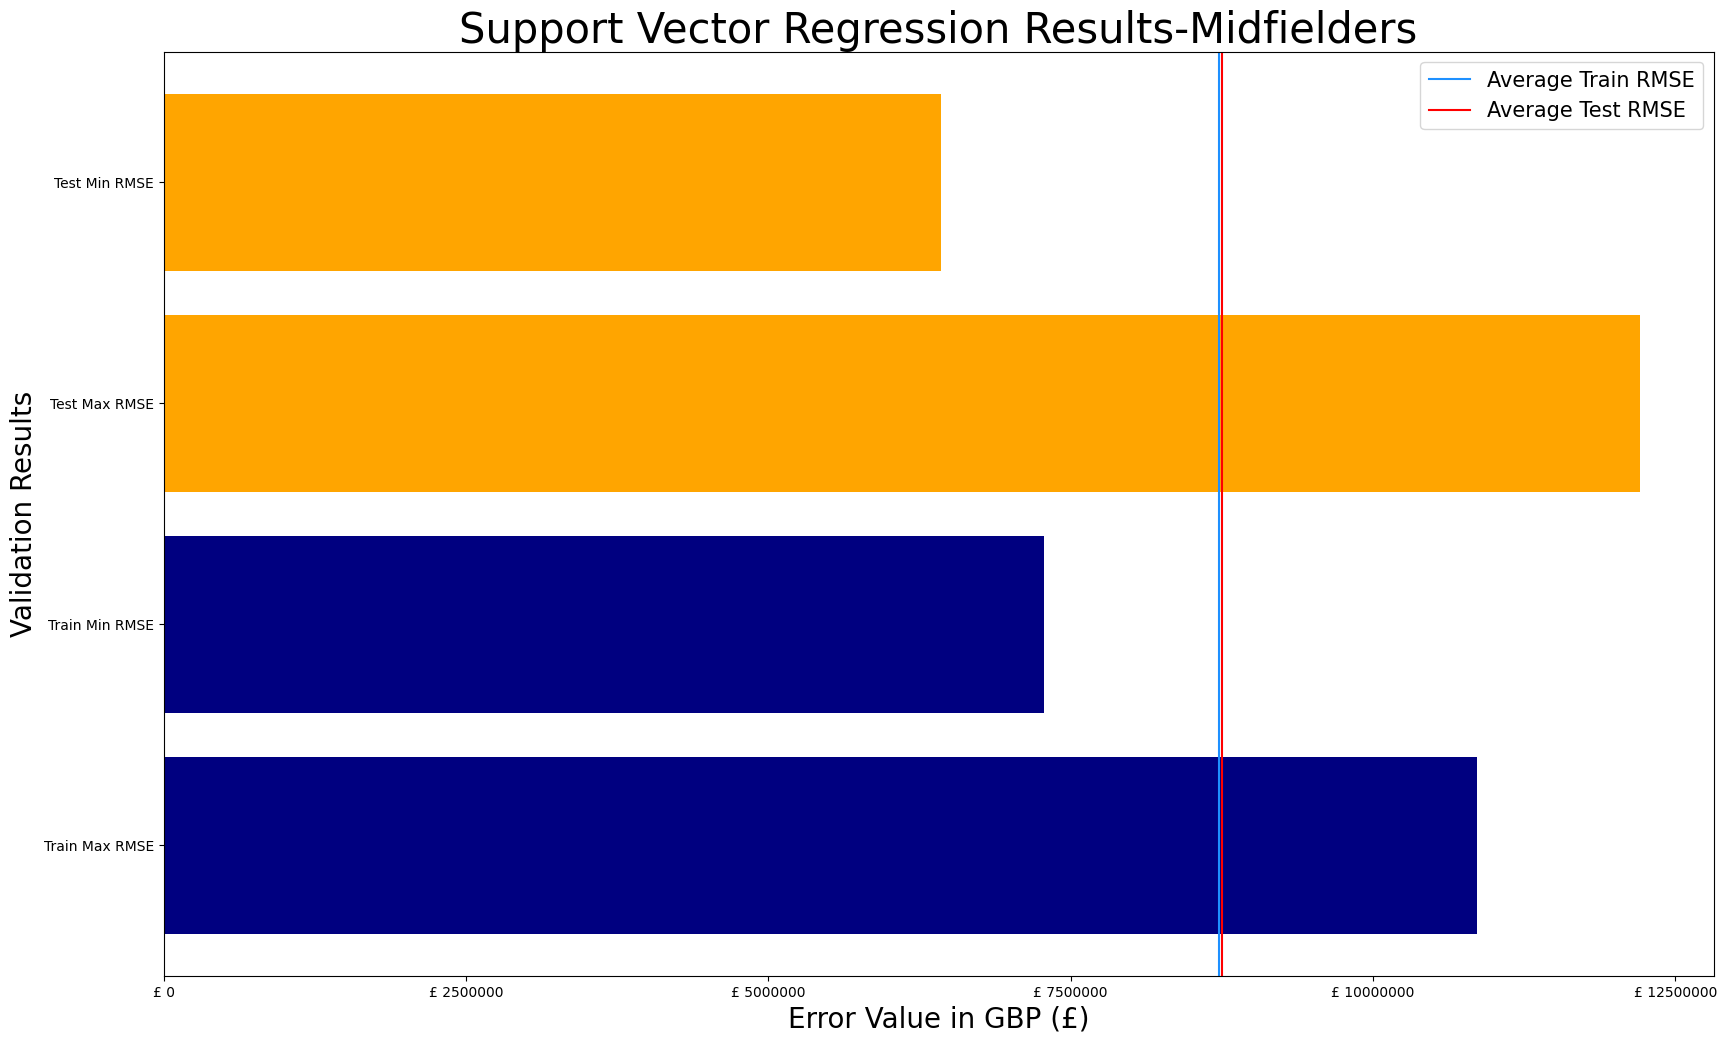

In [54]:
svr_Grid = SVR(C = param_values[0],
              degree = param_values[1],
              gamma = param_values[2],
              kernel=param_values[3])

svr_Grid.fit(X_train,y_train)

cross_val_train = cross_val_score(svr_Grid, X_train, y_train, scoring="neg_root_mean_squared_error",cv=5)
cross_val_test = cross_val_score(svr_Grid, X_test, y_test, scoring="neg_root_mean_squared_error",cv=5)

#Train Results
cross_val_train_mean = round(-(cross_val_train.mean()),2)
cross_val_train_max = round(-(cross_val_train.min()),2)
cross_val_train_min = round(-(cross_val_train.max()),2)

#Test Results
cross_val_test_mean = round(-(cross_val_test.mean()),2)
cross_val_test_max = round(-(cross_val_test.min()),2)
cross_val_test_min = round(-(cross_val_test.max()),2)

fig, ax = plt.subplots(figsize=(20,12))

x_ticks = list(range(0,max([results.iloc[0][2],(round(results.iloc[1][2])+1000000)]),2500000))
y_ticks = [1,2,3,4]
y_labels = ['Train Max RMSE','Train Min RMSE','Test Max RMSE','Test Min RMSE']

train_max_pos = 1
train_max = results.iloc[0][2]
ax.barh(train_max_pos,train_max,color='navy')

train_min_pos = 2
train_min = results.iloc[0][3]
ax.barh(train_min_pos,train_min,color='navy')

test_max_pos = 3
test_max = results.iloc[1][2]
ax.barh(test_max_pos,test_max,color='orange')

test_min_pos = 4
test_min = results.iloc[1][3]
ax.barh(test_min_pos,test_min,color='orange')

results_mid = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results_mid.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results_mid.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

ax.axvline(x = results.iloc[0][1],label = 'Average Train RMSE',color='dodgerblue')
ax.axvline(x = results.iloc[1][1],label = 'Average Test RMSE',color='red')

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_xticks(x_ticks)
ax.set_xticklabels([f'£ {a}' for a in x_ticks])
ax.set_xlabel('Error Value in GBP (£)',fontsize=20)
ax.set_ylabel('Validation Results',fontsize=20)
ax.set_title('Support Vector Regression Results-Midfielders',fontsize=30)
ax.legend(fontsize=15)

In [55]:
results_mid

,Train/Test,Avg RMSE,Max RMSE,Min RMSE
0,Train,5763452.37,8279666.23,4166295.44
1,Test,6681307.45,8768960.50,5241163.59


In [56]:
from sklearn.metrics import r2_score

# Predict on the training and testing sets
y_train_pred = svr_Grid.predict(X_train)
y_test_pred = svr_Grid.predict(X_test)

# Calculate R-squared
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate the number of features
num_features = X_train.shape[1]

# Calculate adjusted R-squared
train_adj_r2 = 1 - (1 - train_r2) * ((len(y_train) - 1) / (len(y_train) - num_features - 1))
test_adj_r2 = 1 - (1 - test_r2) * ((len(y_test) - 1) / (len(y_test) - num_features - 1))

# Print the R-squared and adjusted R-squared values
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)
print("Train Adjusted R-squared:", train_adj_r2)
print("Test Adjusted R-squared:", test_adj_r2)

Train R-squared: 0.5950022461356462
Test R-squared: 0.5826732501005268
Train Adjusted R-squared: 0.5842310292775517
Test Adjusted R-squared: 0.5476037753190586


# Defenders

In [57]:
defender = df[df['Position'] == 'Defender']
defender.head()

,level_0,Player,Age,Matches Played,Start,Goals,Assists,Penalties Made,Yellow Cards,Red Cards,...,Successful Challenge %,Blocks,Interceptions,Tackles + Interceptions,Clearances,Errors,Club,Position,Nation,Value
5,5,Alejandro Balde,18,33,30,1.0,6.0,0.0,4.0,0.0,...,58.5,25.0,12,54.0,17.0,1.0,FC Barcelona,Defender,Spain,46000000.0
10,10,Josko Gvardiol,20,30,24,1.0,0.0,0.0,2.0,0.0,...,40.9,34.0,34,57.0,76.0,1.0,RB Leipzig,Defender,Croatia,40000000.0
14,14,William Saliba,21,27,27,2.0,1.0,0.0,4.0,0.0,...,83.3,13.0,19,53.0,85.0,4.0,Arsenal FC,Defender,France,35000000.0
18,18,Giorgio Scalvini,18,32,29,2.0,2.0,0.0,7.0,0.0,...,52.7,36.0,56,110.0,57.0,2.0,Atalanta BC,Defender,Italy,30000000.0
28,30,Nuno Mendes,20,23,18,1.0,6.0,0.0,2.0,0.0,...,73.2,19.0,17,62.0,18.0,0.0,Paris Saint-Germain,Defender,Portugal,25000000.0


In [58]:
defender.columns

Index(['level_0', 'Player', 'Age', 'Matches Played', 'Start', 'Goals',
       'Assists', 'Penalties Made', 'Yellow Cards', 'Red Cards', 'Shots',
       'Shots On Target', 'Shots On Target %', 'Goals Per Shot',
       'Goals Per Shot On Target', 'Average Shot Distance',
       'Shots From Freekicks', 'Passes Completed', 'Passes',
       'Pass Completion %', 'Total Passing Distance',
       'Progressive Passing Distance', 'Shot-Creating Actions',
       'Shot-Creating Actions/90', 'SCA Pass Live', 'SCA Pass Dead',
       'SCA Take-ons', 'SCA Shots', 'SCA Fouls', 'SCA Defense',
       'Goal-Creating Actions', 'Goal-Creating Actions/90', 'Goal Pass Live',
       'Goal Pass Dead', 'Goal Take-ons', 'Goal Shots', 'Goal Fouls',
       'Goal Defense', 'Tackles', 'Tackles Won', 'Challenges',
       'Successful Challenge %', 'Blocks', 'Interceptions',
       'Tackles + Interceptions', 'Clearances', 'Errors', 'Club', 'Position',
       'Nation', 'Value'],
      dtype='object')

In [59]:
X = defender.drop(['Player', 'Matches Played', 'Start', 'Goals',
       'Penalties Made', 'Yellow Cards', 'Red Cards', 'Shots',
       'Shots On Target', 'Shots On Target %', 'Goals Per Shot',
       'Goals Per Shot On Target', 'Average Shot Distance',
       'Shots From Freekicks', 'Passes Completed', 'Passes',
       'Pass Completion %', 'Total Passing Distance', 'Shot-Creating Actions',
       'Shot-Creating Actions/90', 'SCA Pass Live', 'SCA Pass Dead',
       'SCA Take-ons', 'SCA Shots', 'SCA Fouls', 'SCA Defense',
       'Goal-Creating Actions', 'Goal-Creating Actions/90', 'Goal Pass Live',
       'Goal Pass Dead', 'Goal Take-ons', 'Goal Shots', 'Goal Fouls', 'Position',
       'Nation', 'Value', 'Club'
       ],axis=1)
y = defender['Value']

In [60]:
X.dtypes

level_0                           int64
Age                               int64
Assists                         float64
Progressive Passing Distance    float64
Goal Defense                    float64
Tackles                         float64
Tackles Won                       int64
Challenges                      float64
Successful Challenge %          float64
Blocks                          float64
Interceptions                     int64
Tackles + Interceptions         float64
Clearances                      float64
Errors                          float64
dtype: object

# Model Training

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

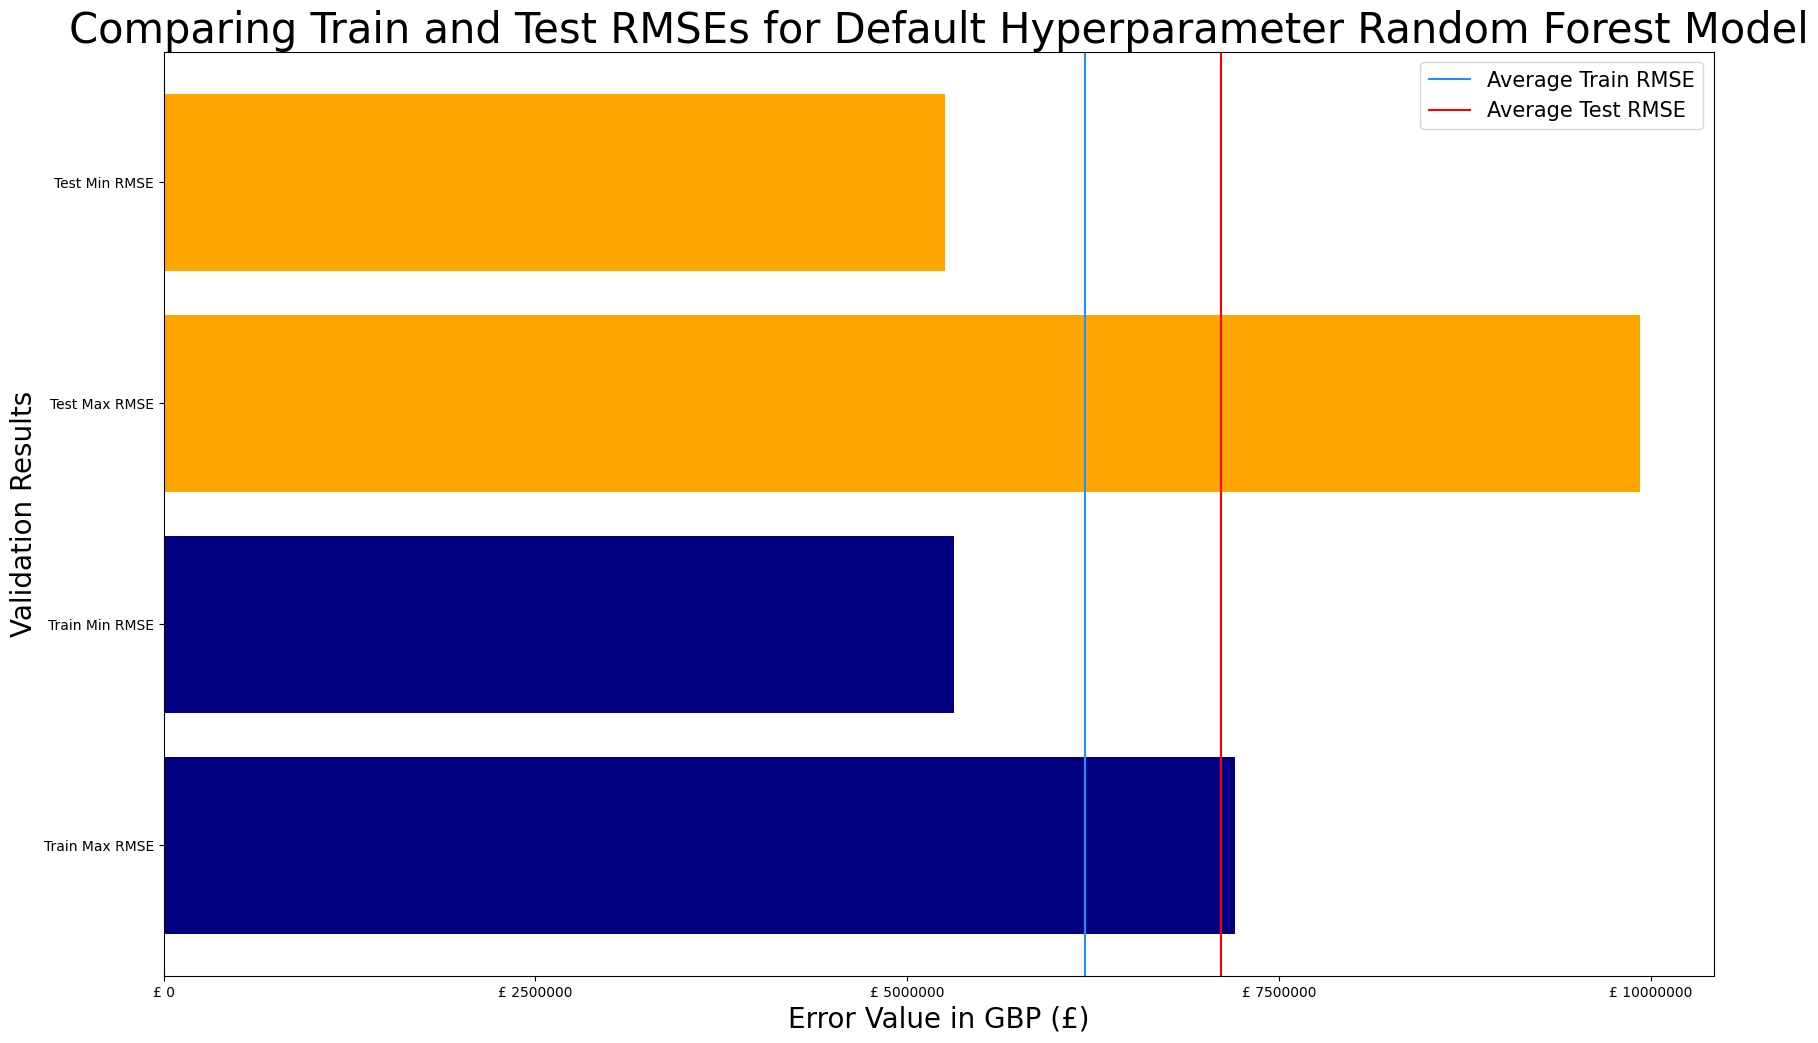

In [62]:
#Robust Scaler
rs= RobustScaler()
X_train = rs.fit_transform(X_train)
X_test = rs.transform(X_test)

svr = SVR(kernel='rbf')
svr.fit(X_train,y_train)

cross_val_train = cross_val_score(svr, X_train, y_train, scoring="neg_root_mean_squared_error",cv=5)
cross_val_test = cross_val_score(svr, X_test, y_test, scoring="neg_root_mean_squared_error",cv=5)

#Train Results
cross_val_train_mean = round(-(cross_val_train.mean()),2)
cross_val_train_max = round(-(cross_val_train.min()),2)
cross_val_train_min = round(-(cross_val_train.max()),2)

#Test Results
cross_val_test_mean = round(-(cross_val_test.mean()),2)
cross_val_test_max = round(-(cross_val_test.min()),2)
cross_val_test_min = round(-(cross_val_test.max()),2)

#Creating a Dataframe to display Validation Results
results = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

fig, ax = plt.subplots(figsize=(20,12))

x_ticks = list(range(0,max([results.iloc[0][2],(round(results.iloc[1][2])+1000000)]),2500000))
y_ticks = [1,2,3,4]
y_labels = ['Train Max RMSE','Train Min RMSE','Test Max RMSE','Test Min RMSE']

train_max_pos = 1
train_max = results.iloc[0][2]
ax.barh(train_max_pos,train_max,color='navy')

train_min_pos = 2
train_min = results.iloc[0][3]
ax.barh(train_min_pos,train_min,color='navy')

test_max_pos = 3
test_max = results.iloc[1][2]
ax.barh(test_max_pos,test_max,color='orange')

test_min_pos = 4
test_min = results.iloc[1][3]
ax.barh(test_min_pos,test_min,color='orange')

results_def = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results_def.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results_def.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

ax.axvline(x = results.iloc[0][1],label = 'Average Train RMSE',color='dodgerblue')
ax.axvline(x = results.iloc[1][1],label = 'Average Test RMSE',color='red')

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_xticks(x_ticks)
ax.set_xticklabels([f'£ {a}' for a in x_ticks])
ax.set_xlabel('Error Value in GBP (£)',fontsize=20)
ax.set_ylabel('Validation Results',fontsize=20)
ax.set_title('Comparing Train and Test RMSEs for Default Hyperparameter Random Forest Model',fontsize=30)
ax.legend(fontsize=15)

In [63]:
results_def

,Train/Test,Avg RMSE,Max RMSE,Min RMSE
0,Train,6195028.87,7203535.87,5318662.86
1,Test,7109610.99,9926757.37,5252955.67


In [64]:
from sklearn.metrics import r2_score

# Predict on the training and testing sets
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

# Calculate R-squared
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate the number of features
num_features = X_train.shape[1]

# Calculate adjusted R-squared
train_adj_r2 = 1 - (1 - train_r2) * ((len(y_train) - 1) / (len(y_train) - num_features - 1))
test_adj_r2 = 1 - (1 - test_r2) * ((len(y_test) - 1) / (len(y_test) - num_features - 1))

# Print the R-squared and adjusted R-squared values
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)
print("Train Adjusted R-squared:", train_adj_r2)
print("Test Adjusted R-squared:", test_adj_r2)

Train R-squared: -0.021031263790442623
Test R-squared: -0.012284160110457076
Train Adjusted R-squared: -0.05157493407477198
Test Adjusted R-squared: -0.1093525042306378


In [65]:
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                        Variable        VIF
0                        level_0   5.557939
1                            Age  20.032001
2                        Assists   1.895780
3   Progressive Passing Distance  10.612710
4                   Goal Defense   1.082725
5                        Tackles        inf
6                    Tackles Won  65.139881
7                     Challenges  31.521951
8         Successful Challenge %  11.974623
9                         Blocks  15.341324
10                 Interceptions        inf
11       Tackles + Interceptions        inf
12                    Clearances  10.872405
13                        Errors   1.763609


/Users/tony/Library/Python/3.9/lib/python/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [66]:
X = X.drop(['Tackles + Interceptions', 'Tackles Won', 'Challenges'], axis=1)

In [67]:
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                        Variable        VIF
0                        level_0   5.517762
1                            Age  19.754129
2                        Assists   1.879519
3   Progressive Passing Distance  10.573124
4                   Goal Defense   1.081859
5                        Tackles  10.562570
6         Successful Challenge %  11.746721
7                         Blocks  15.319129
8                  Interceptions  10.492968
9                     Clearances  10.702670
10                        Errors   1.760971


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

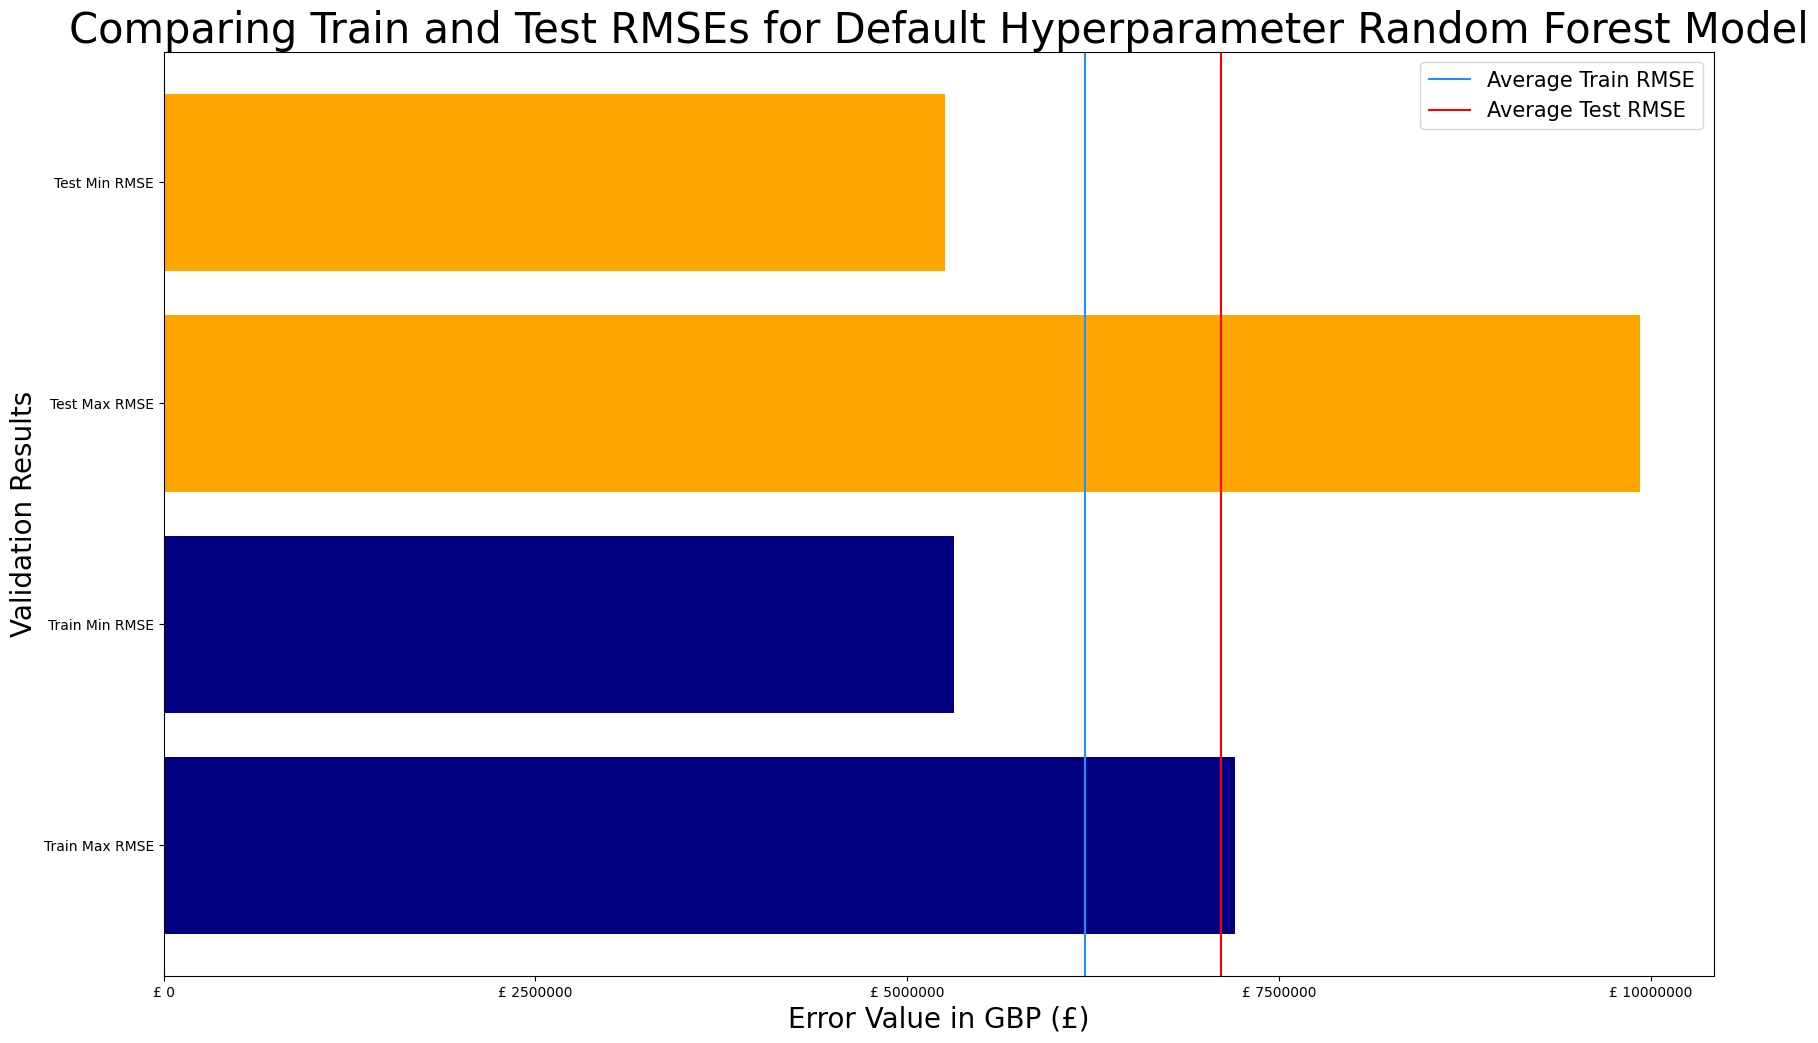

In [69]:
#Robust Scaler
rs= RobustScaler()
X_train = rs.fit_transform(X_train)
X_test = rs.transform(X_test)

pt = PowerTransformer()
X_train = pt.fit_transform(X_train)
X_test = pt.transform(X_test)

svr = SVR(kernel='rbf')
svr.fit(X_train,y_train)

cross_val_train = cross_val_score(svr, X_train, y_train, scoring="neg_root_mean_squared_error",cv=5)
cross_val_test = cross_val_score(svr, X_test, y_test, scoring="neg_root_mean_squared_error",cv=5)

#Train Results
cross_val_train_mean = round(-(cross_val_train.mean()),2)
cross_val_train_max = round(-(cross_val_train.min()),2)
cross_val_train_min = round(-(cross_val_train.max()),2)

#Test Results
cross_val_test_mean = round(-(cross_val_test.mean()),2)
cross_val_test_max = round(-(cross_val_test.min()),2)
cross_val_test_min = round(-(cross_val_test.max()),2)

#Creating a Dataframe to display Validation Results
results = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

fig, ax = plt.subplots(figsize=(20,12))

x_ticks = list(range(0,max([results.iloc[0][2],(round(results.iloc[1][2])+1000000)]),2500000))
y_ticks = [1,2,3,4]
y_labels = ['Train Max RMSE','Train Min RMSE','Test Max RMSE','Test Min RMSE']

train_max_pos = 1
train_max = results.iloc[0][2]
ax.barh(train_max_pos,train_max,color='navy')

train_min_pos = 2
train_min = results.iloc[0][3]
ax.barh(train_min_pos,train_min,color='navy')

test_max_pos = 3
test_max = results.iloc[1][2]
ax.barh(test_max_pos,test_max,color='orange')

test_min_pos = 4
test_min = results.iloc[1][3]
ax.barh(test_min_pos,test_min,color='orange')

results_def = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results_def.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results_def.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

ax.axvline(x = results.iloc[0][1],label = 'Average Train RMSE',color='dodgerblue')
ax.axvline(x = results.iloc[1][1],label = 'Average Test RMSE',color='red')

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_xticks(x_ticks)
ax.set_xticklabels([f'£ {a}' for a in x_ticks])
ax.set_xlabel('Error Value in GBP (£)',fontsize=20)
ax.set_ylabel('Validation Results',fontsize=20)
ax.set_title('Comparing Train and Test RMSEs for Default Hyperparameter Random Forest Model',fontsize=30)
ax.legend(fontsize=15)

In [70]:
results_def

,Train/Test,Avg RMSE,Max RMSE,Min RMSE
0,Train,6195023.40,7203531.65,5318656.85
1,Test,7109609.21,9926755.53,5252954.43


In [71]:
from sklearn.metrics import r2_score

# Predict on the training and testing sets
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

# Calculate R-squared
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate the number of features
num_features = X_train.shape[1]

# Calculate adjusted R-squared
train_adj_r2 = 1 - (1 - train_r2) * ((len(y_train) - 1) / (len(y_train) - num_features - 1))
test_adj_r2 = 1 - (1 - test_r2) * ((len(y_test) - 1) / (len(y_test) - num_features - 1))

# Print the R-squared and adjusted R-squared values
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)
print("Train Adjusted R-squared:", train_adj_r2)
print("Test Adjusted R-squared:", test_adj_r2)

Train R-squared: -0.021029110849786203
Test R-squared: -0.01228229651043633
Train Adjusted R-squared: -0.044874801336723946
Test Adjusted R-squared: -0.08701454658838803


# Tuning

In [72]:
parameters = { 'C':[0.1,1,100,1000],
              'kernel':['rbf','poly','sigmoid','linear'],
              'degree':[1,2,3,4,5,6],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

grid_search = GridSearchCV(estimator = svr, param_grid = parameters, 
                          cv = 5, n_jobs = -1, verbose = 2)

grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
[CV] END ...............C=0.1, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.1, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.1, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.1, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..............C=0.1, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ...............C=0.1, degree=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..............C=0.1, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..............C=0.1, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..............C=0.1, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..............C=0.1, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ...........C=0.1, degree=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ...........C=0.1, degree=1, gamma=1,

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 100, 1000], 'degree': [1, 2, 3, 4, 5, 6],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             verbose=2)

In [73]:
grid_search.best_params_

{'C': 100, 'degree': 5, 'gamma': 1, 'kernel': 'poly'}

In [74]:
param_values = list((grid_search.best_params_).values())
param_values

[100, 5, 1, 'poly']

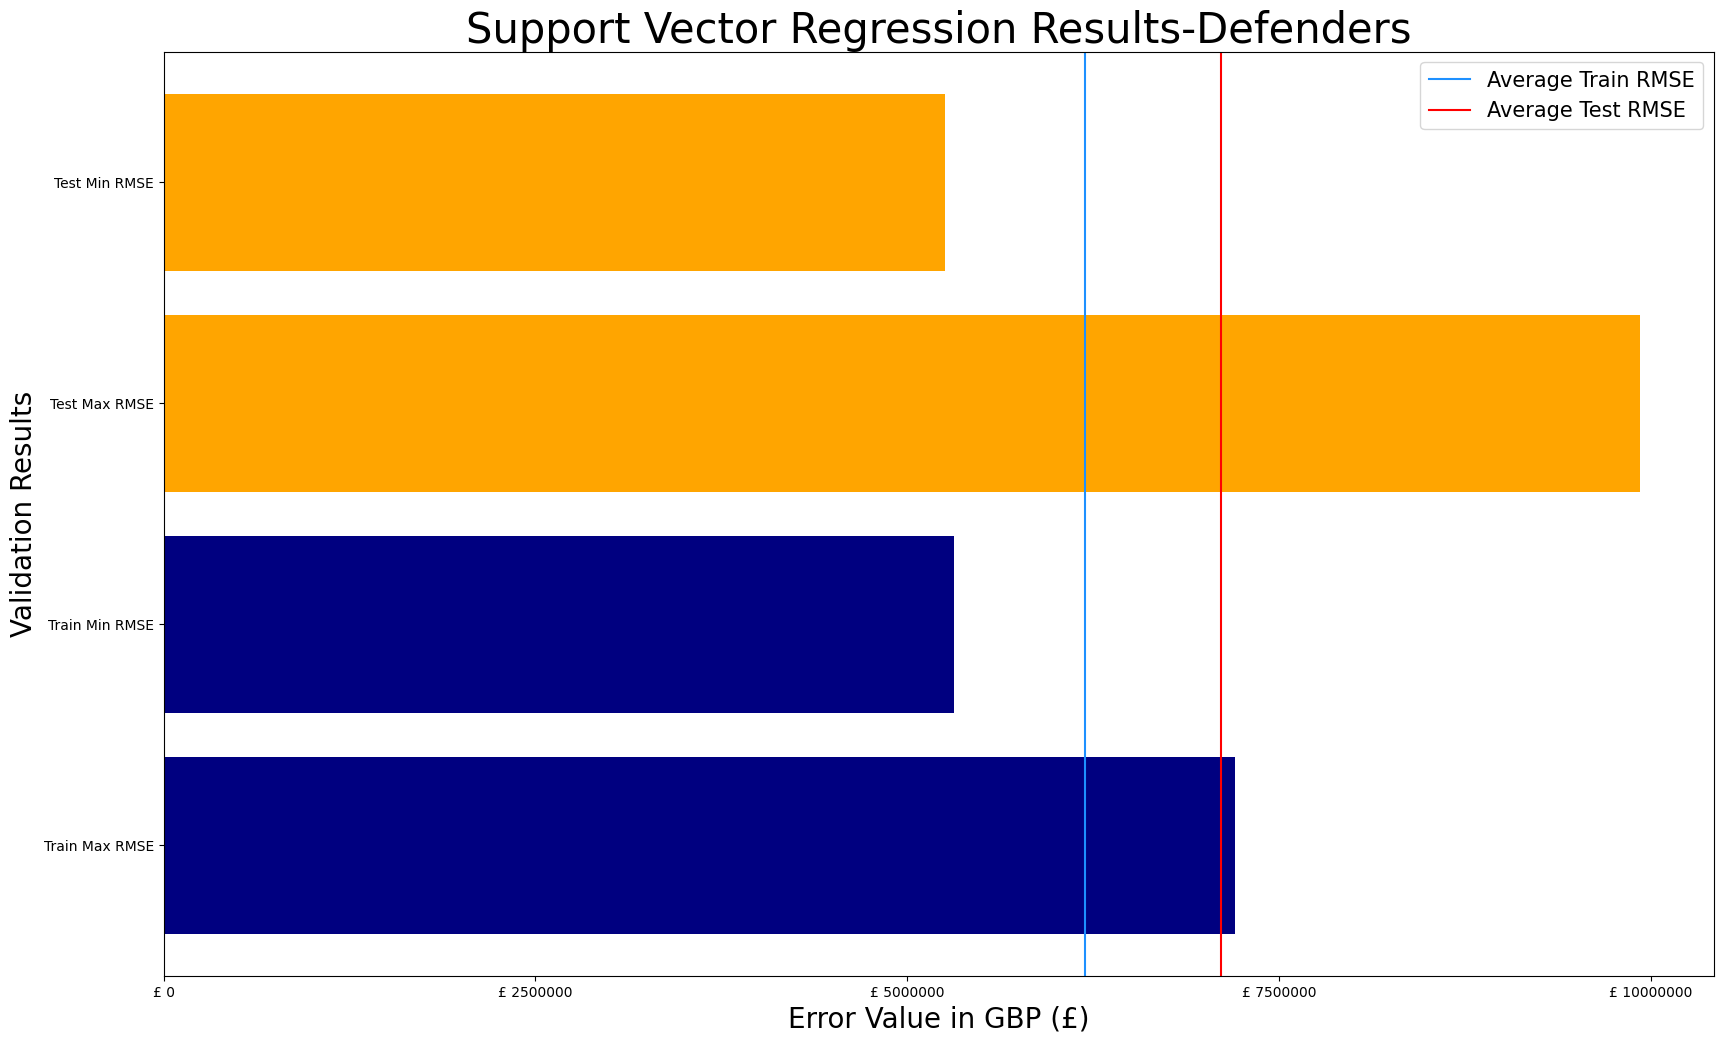

In [75]:
svr_Grid = SVR(C = param_values[0],
              degree = param_values[1],
              gamma = param_values[2],
              kernel=param_values[3])

svr_Grid.fit(X_train,y_train)

cross_val_train = cross_val_score(svr_Grid, X_train, y_train, scoring="neg_root_mean_squared_error",cv=5)
cross_val_test = cross_val_score(svr_Grid, X_test, y_test, scoring="neg_root_mean_squared_error",cv=5)

#Train Results
cross_val_train_mean = round(-(cross_val_train.mean()),2)
cross_val_train_max = round(-(cross_val_train.min()),2)
cross_val_train_min = round(-(cross_val_train.max()),2)

#Test Results
cross_val_test_mean = round(-(cross_val_test.mean()),2)
cross_val_test_max = round(-(cross_val_test.min()),2)
cross_val_test_min = round(-(cross_val_test.max()),2)

fig, ax = plt.subplots(figsize=(20,12))

x_ticks = list(range(0,max([results.iloc[0][2],(round(results.iloc[1][2])+1000000)]),2500000))
y_ticks = [1,2,3,4]
y_labels = ['Train Max RMSE','Train Min RMSE','Test Max RMSE','Test Min RMSE']

train_max_pos = 1
train_max = results.iloc[0][2]
ax.barh(train_max_pos,train_max,color='navy')

train_min_pos = 2
train_min = results.iloc[0][3]
ax.barh(train_min_pos,train_min,color='navy')

test_max_pos = 3
test_max = results.iloc[1][2]
ax.barh(test_max_pos,test_max,color='orange')

test_min_pos = 4
test_min = results.iloc[1][3]
ax.barh(test_min_pos,test_min,color='orange')

results_def = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results_def.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results_def.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

ax.axvline(x = results.iloc[0][1],label = 'Average Train RMSE',color='dodgerblue')
ax.axvline(x = results.iloc[1][1],label = 'Average Test RMSE',color='red')

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_xticks(x_ticks)
ax.set_xticklabels([f'£ {a}' for a in x_ticks])
ax.set_xlabel('Error Value in GBP (£)',fontsize=20)
ax.set_ylabel('Validation Results',fontsize=20)
ax.set_title('Support Vector Regression Results-Defenders',fontsize=30)
ax.legend(fontsize=15)

In [76]:
results_def

,Train/Test,Avg RMSE,Max RMSE,Min RMSE
0,Train,3430111.42,4284264.70,2530694.87
1,Test,5284457.91,7335659.49,2992451.68


In [77]:
from sklearn.metrics import r2_score

# Predict on the training and testing sets
y_train_pred = svr_Grid.predict(X_train)
y_test_pred = svr_Grid.predict(X_test)

# Calculate R-squared
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate the number of features
num_features = X_train.shape[1]

# Calculate adjusted R-squared
train_adj_r2 = 1 - (1 - train_r2) * ((len(y_train) - 1) / (len(y_train) - num_features - 1))
test_adj_r2 = 1 - (1 - test_r2) * ((len(y_test) - 1) / (len(y_test) - num_features - 1))

# Print the R-squared and adjusted R-squared values
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)
print("Train Adjusted R-squared:", train_adj_r2)
print("Test Adjusted R-squared:", test_adj_r2)

Train R-squared: 0.905278370753881
Test R-squared: 0.7373852944508126
Train Adjusted R-squared: 0.903066188329874
Test Adjusted R-squared: 0.7179976316250336


# Graphing All RMSE Together

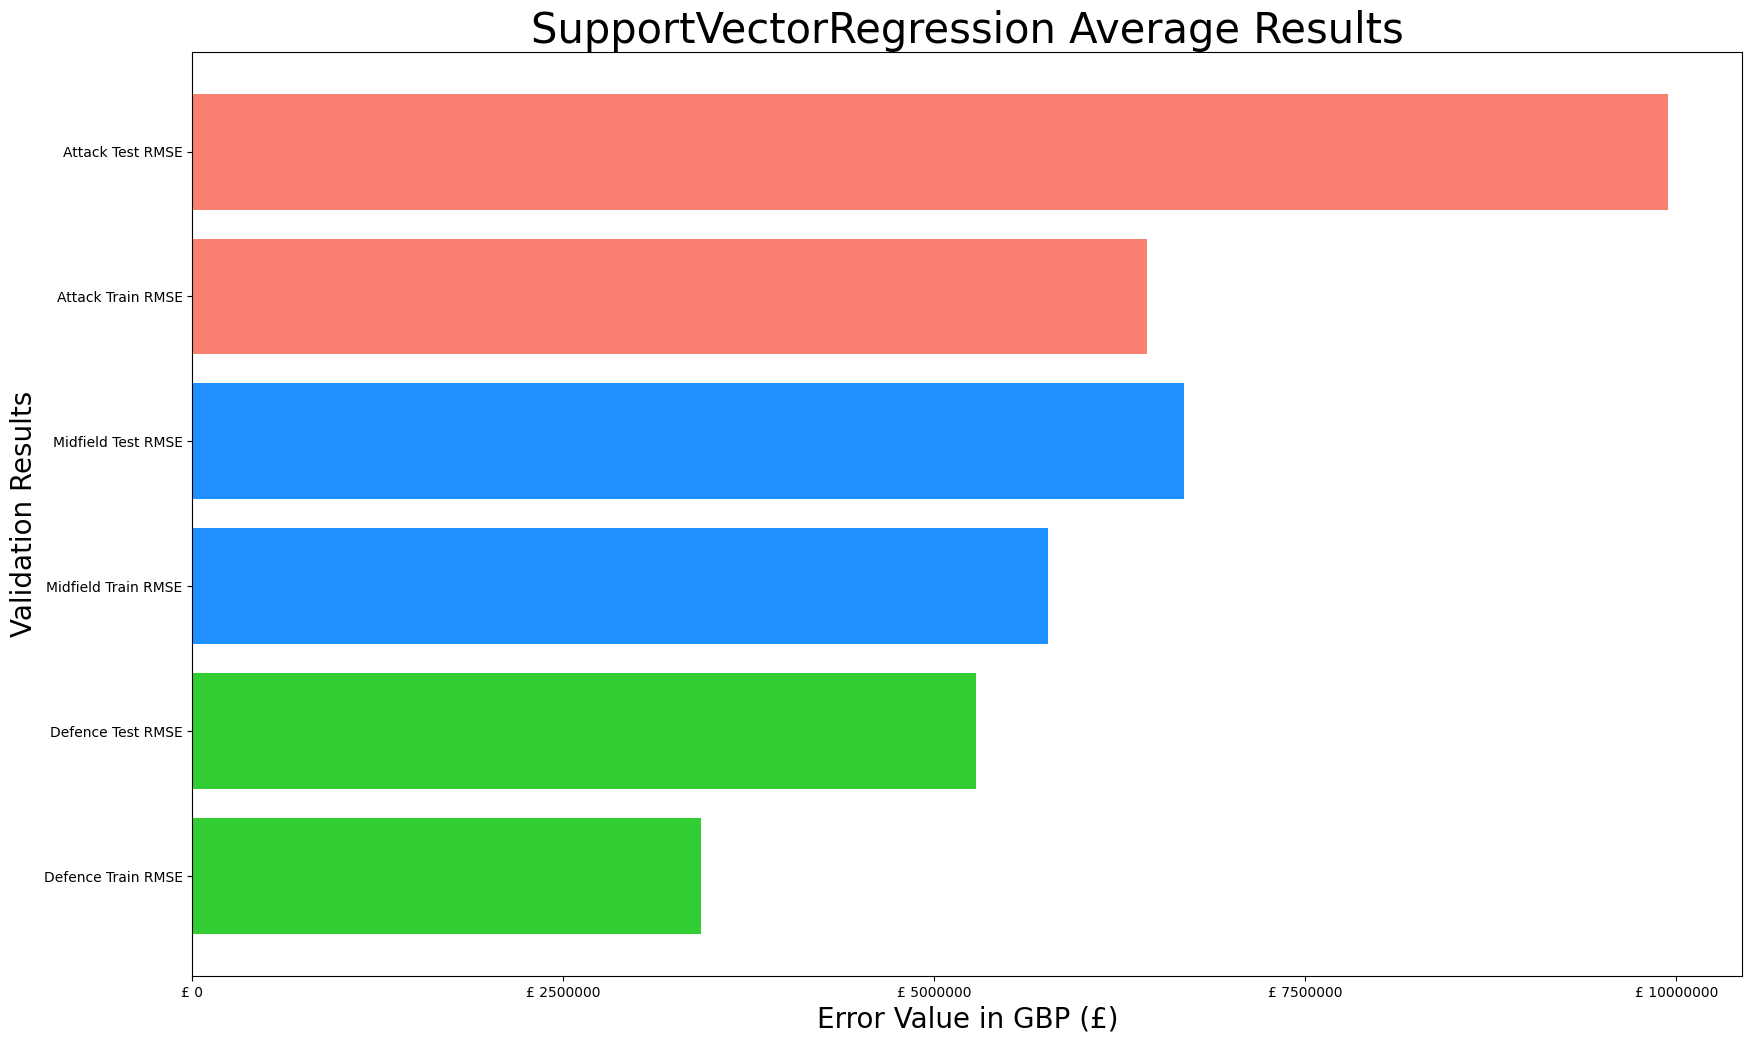

In [79]:
fig, ax = plt.subplots(figsize=(20,12))

x_ticks = list(range(0,int(max([max(results_att['Avg RMSE']),max(results_mid['Avg RMSE']),max(results_def['Avg RMSE'])])+1000000),2500000))
y_ticks = [1,2,3,4,5,6]
y_ticks = [1,2,3,4,5,6]
y_labels = ['Defence Train RMSE','Defence Test RMSE',
            'Midfield Train RMSE','Midfield Test RMSE',
            'Attack Train RMSE','Attack Test RMSE',]

#Attack Results
att_train_pos = 5
att_train = results_att.iloc[0][1]
ax.barh(att_train_pos,att_train,color='salmon')

att_test_pos = 6
att_test = results_att.iloc[1][1]
ax.barh(att_test_pos,att_test,color='salmon')

#Midfield Results
mid_train_pos = 3
mid_train = results_mid.iloc[0][1]
ax.barh(mid_train_pos,mid_train,color='dodgerblue')

mid_test_pos = 4
mid_test = results_mid.iloc[1][1]
ax.barh(mid_test_pos,mid_test,color='dodgerblue')

#Defence Results
def_train_pos = 1
def_train = results_def.iloc[0][1]
ax.barh(def_train_pos,def_train,color='limegreen')

def_test_pos = 2
def_test = results_def.iloc[1][1]
ax.barh(def_test_pos,def_test,color='limegreen')

#Labels
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_xticks(x_ticks)
ax.set_xticklabels([f'£ {a}' for a in x_ticks])
ax.set_xlabel('Error Value in GBP (£)',fontsize=20)
ax.set_ylabel('Validation Results',fontsize=20)
ax.set_title('SupportVectorRegression Average Results',fontsize=30);